In [1]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 5.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import tree
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from mlxtend.plotting import plot_decision_regions
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from mlxtend.plotting import plot_confusion_matrix
import shap
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)

Numpy Version 1.26.4
Pandas Version 2.1.4
Seaborn Version 0.13.1


In [4]:
# Loading the Data set in the dataframe
edf = pd.read_csv('hotel_bookings_EDF.csv')

# Checking the firat 5 rows of the data
edf.head()

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,...,required_car_parking_spaces,totalno_of_special_requests,booking_year,booking_month,booking_day,booking_day_of_week,arrival_year,arrival_month,arrival_day,arrival_day_of_week
0,1,0,0,0,2,0,3,135,3,1,...,0,0,2017,7,24,0,2018,7,1,6
1,1,0,0,0,2,0,3,135,3,1,...,0,0,2016,6,24,4,2018,7,1,6
2,1,0,0,1,1,0,3,59,3,1,...,0,0,2018,6,24,6,2018,7,1,6
3,1,0,0,1,1,0,3,59,2,0,...,0,0,2018,6,18,0,2018,7,1,6
4,1,0,0,2,2,0,3,59,6,3,...,0,1,2018,6,17,6,2018,7,1,6


In [5]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   stays_in_weekend_nights         119390 non-null  int64  
 3   stays_in_week_nights            119390 non-null  int64  
 4   adults                          119390 non-null  int64  
 5   children                        119390 non-null  int64  
 6   meal                            119390 non-null  int64  
 7   country                         119390 non-null  int64  
 8   market_segment                  119390 non-null  int64  
 9   distribution_channel            119390 non-null  int64  
 10  is_repeated_customer            119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

In [6]:
X = edf.drop(columns=['is_canceled'], axis = 1)
y = edf['is_canceled']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#X_train.to_csv('/content/X_train_withoutliers.csv')
#X_test.to_csv('/content/X_test_withoutliers.csv')
#y_train.to_csv('/content/y_train_withoutliers.csv')
#y_test.to_csv('/content/y_test_withoutliers.csv')

In [8]:
X_train.shape

(83573, 29)

In [9]:
X_test.shape

(35817, 29)

In [10]:
y.value_counts(normalize=True)

,proportion
is_canceled,
0,0.629584
1,0.370416


#Random Forest

In [ ]:
rf = RandomForestClassifier(random_state= 50).fit(X_train, y_train)

In [ ]:
# Making predictions
y_pred = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [ ]:
y_pred_proba = rf.predict_proba(X_train)[:, 1]
y_pred_proba_test = rf.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report for train set
class_report = classification_report(y_train, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52688
           1       1.00      0.99      0.99     30885

    accuracy                           1.00     83573
   macro avg       1.00      0.99      1.00     83573
weighted avg       1.00      1.00      1.00     83573



Confusion Matrix:
 [[52548   140]
 [  228 30657]]
Confusion Matrix for Random Forest Model  on Train Data


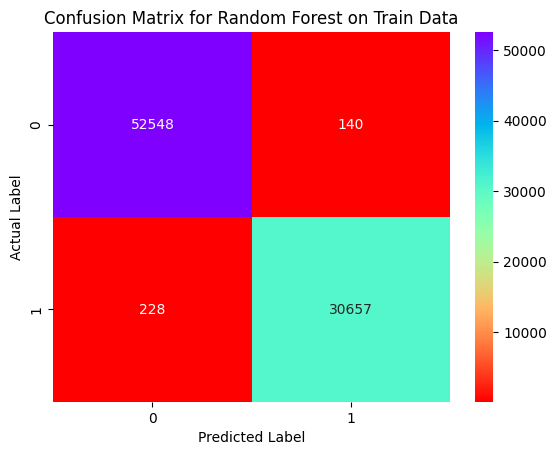

In [ ]:
# Confusion Matrix for train data
conf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print('Confusion Matrix for Random Forest Model  on Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Random Forest on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Random Forest on Train Data")
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)

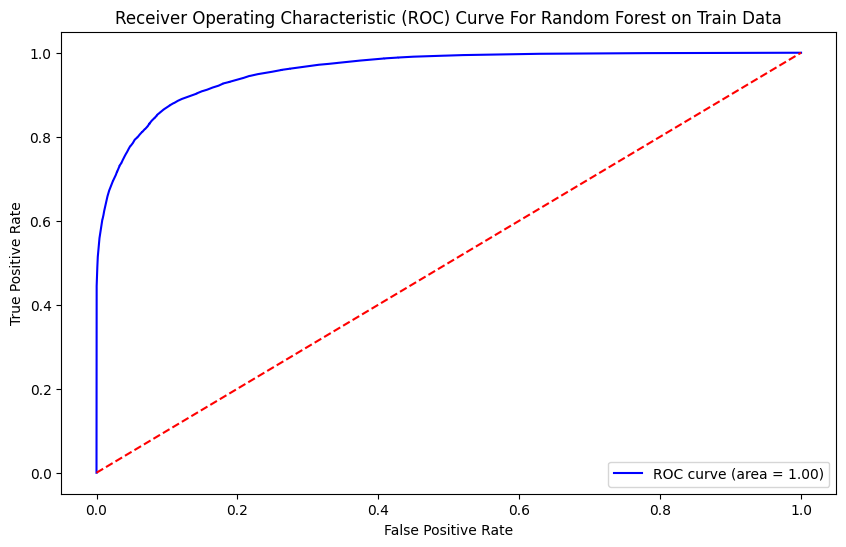

AUC: 0.999563306956377


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For Random Forest on Train Data' )
plt.legend(loc="lower right")
plt.savefig("ROC Curve for Random Forest on Train Data")
plt.show()
print(f"AUC: {roc_auc}")

In [ ]:
# Classification Report for test set
class_report_test = classification_report(y_test, y_pred_test)
print("Classification Report:\n", class_report_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     22478
           1       0.89      0.81      0.84     13339

    accuracy                           0.89     35817
   macro avg       0.89      0.87      0.88     35817
weighted avg       0.89      0.89      0.89     35817



Confusion Matrix:
 [[21116  1362]
 [ 2585 10754]]
Confusion Matrix for Random Forest Model  on Test Data


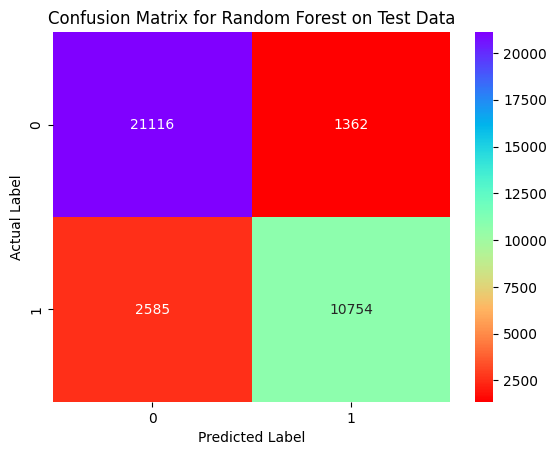

In [ ]:
# Confusion Matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix_test)
print('Confusion Matrix for Random Forest Model  on Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Random Forest on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Random Forest on Test Data")
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr, tpr)

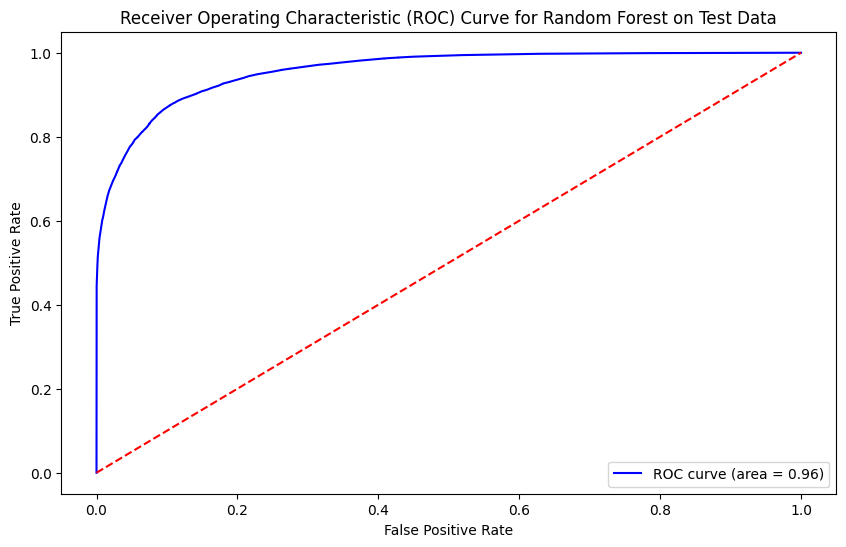

AUC: 0.9579676313071882


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest on Test Data')
plt.legend(loc="lower right")
plt.savefig("ROC Curve for Random Forest on Test Data")
plt.show()
print(f"AUC: {roc_auc_test}")

In [ ]:
def plot_learning_curve(estimator, X, y, title='Learning Curve', cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(f'Learning Curve for {estimator}')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.legend(loc='best')
    plt.savefig(f"Learning Curve for {estimator}.jpg")
    plt.show()

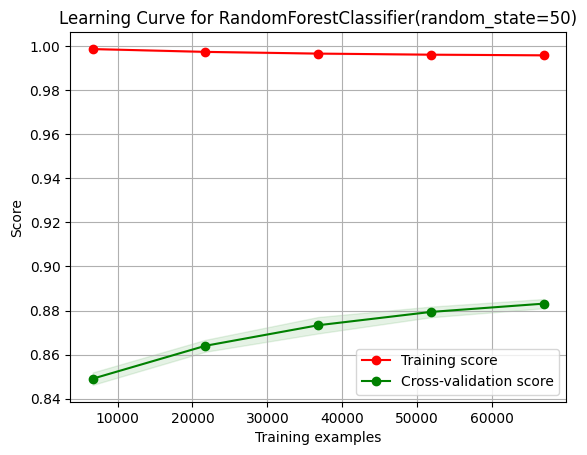

In [ ]:
# Assuming you have a model, X_train, y_train
plot_learning_curve(rf, X_train, y_train)

#Random Forest with Feature Selection

In [ ]:
# Feature Selection
rf_feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rf_feature_scores

,0
deposit_type,0.132862
country,0.108363
agent,0.060803
booking_day,0.058584
arrival_day,0.057524
totalno_of_special_requests,0.056779
market_segment,0.053318
booking_month,0.044718
arrival_month,0.044542
stays_in_week_nights,0.038078


In [ ]:
rf_feature_scores.to_csv('/content/Random_Forest_FI.csv')

In [ ]:
X_train_rff = X_train.drop(['days_in_waiting_list', 'is_repeated_customer', 'previous_bookings_not_canceled','children'], axis = 1 )
X_test_rff = X_test.drop(['days_in_waiting_list', 'is_repeated_customer', 'previous_bookings_not_canceled','children'], axis = 1 )

In [ ]:
rf_f = RandomForestClassifier(random_state= 50).fit(X_train_rff, y_train)

In [ ]:
y_pred_rf_f = rf_f.predict(X_train_rff)
y_pred_rftest_f = rf_f.predict(X_test_rff)

In [ ]:
y_pred_proba_rff = rf_f.predict_proba(X_train_rff)[:, 1]
y_pred_proba_test_rff = rf_f.predict_proba(X_test_rff)[:, 1]

In [ ]:
# Classification Report for train set
rff_class_report = classification_report(y_train, y_pred_rf_f)
print("Classification Report:\n", rff_class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52688
           1       1.00      0.99      0.99     30885

    accuracy                           1.00     83573
   macro avg       1.00      0.99      1.00     83573
weighted avg       1.00      1.00      1.00     83573



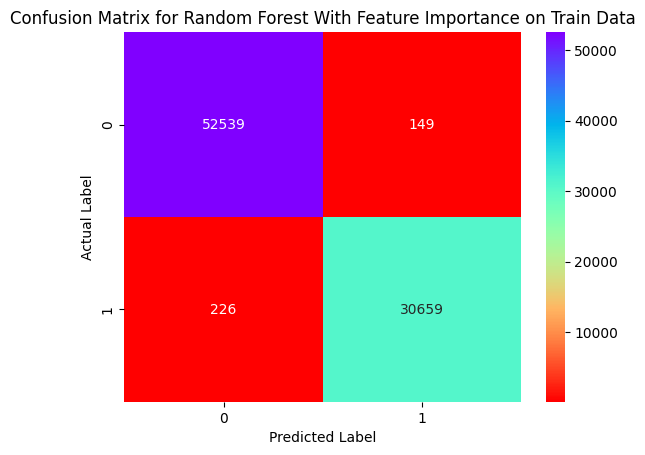

In [ ]:
# Confusion Matrix for train data
sns.heatmap(confusion_matrix(y_train,y_pred_rf_f),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Random Forest With Feature Importance on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Random Forest With Feature Importance on Train Data")
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_rff)
roc_auc_rff = auc(fpr, tpr)

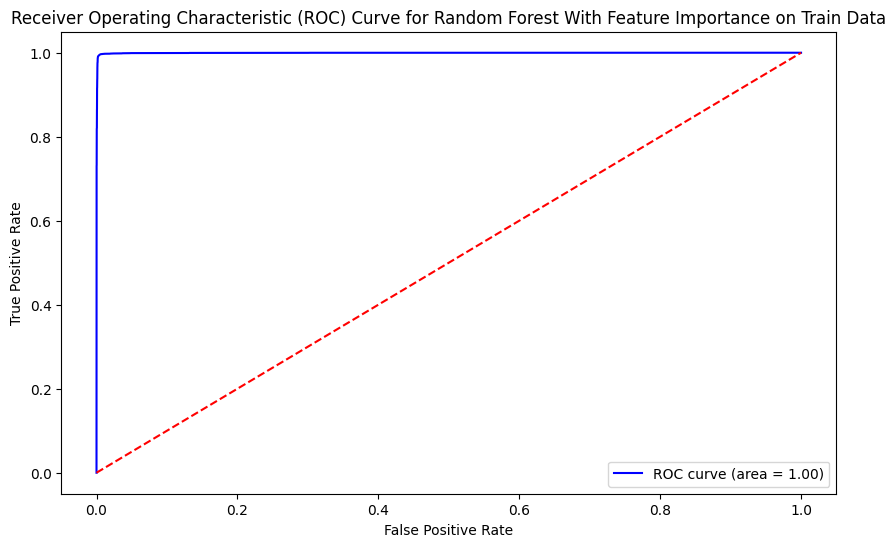

AUC: 0.9995593656900758


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_rff)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest With Feature Importance on Train Data')
plt.legend(loc="lower right")
plt.savefig("ROC Curve for Random Forest With Feature Importance on Train Data")
plt.show()
print(f"AUC: {roc_auc_rff}")

In [ ]:
# Classification Report for test set
rff_class_report_test = classification_report(y_test, y_pred_rftest_f)
print("Classification Report:\n", rff_class_report_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     22478
           1       0.89      0.81      0.84     13339

    accuracy                           0.89     35817
   macro avg       0.89      0.87      0.88     35817
weighted avg       0.89      0.89      0.89     35817



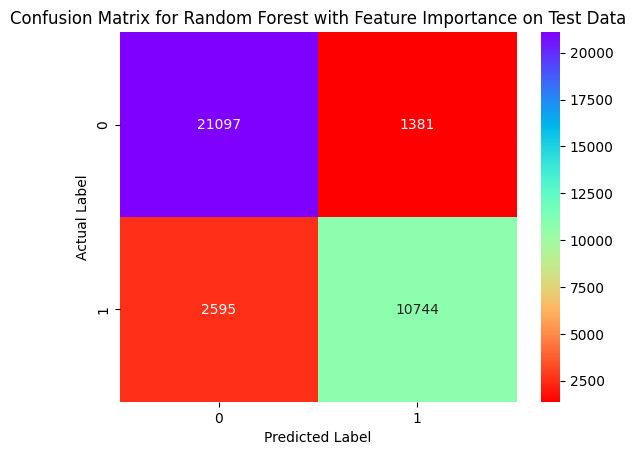

In [ ]:
# Confusion Matrix for test data
sns.heatmap(confusion_matrix(y_test,y_pred_rftest_f),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Random Forest with Feature Importance on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Random Forest with Feature Importance on Test Data")
plt.show()

In [ ]:
# ROC Curve and AUC for test set data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_rff)
roc_auc_test_rff = auc(fpr, tpr)

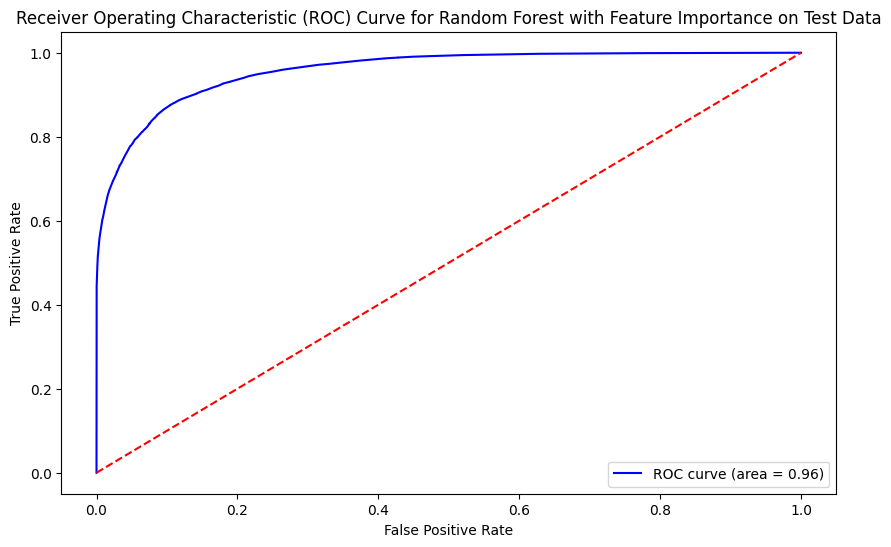

AUC: 0.9574660338268062


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_rff)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest with Feature Importance on Test Data')
plt.legend(loc="lower right")
plt.savefig("ROC Curve for Random Forest with Feature Importance on Test Data")
plt.show()
print(f"AUC: {roc_auc_test_rff}")

# Decision Tree Classifier

In [11]:
dt = DecisionTreeClassifier(random_state=50).fit(X_train, y_train)

In [12]:
y_pred_dt = dt.predict(X_train)
y_pred_dttest = dt.predict(X_test)

In [13]:
y_pred_proba_dt = dt.predict_proba(X_train)[:, 1]
y_pred_proba_test_dt = dt.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report for train set
class_reportdt = classification_report(y_train, y_pred_dt)
print("Classification Report:\n", class_reportdt)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52688
           1       1.00      0.99      0.99     30885

    accuracy                           1.00     83573
   macro avg       1.00      0.99      1.00     83573
weighted avg       1.00      1.00      1.00     83573



Confusion Matrix for Decision Tree on Train Data


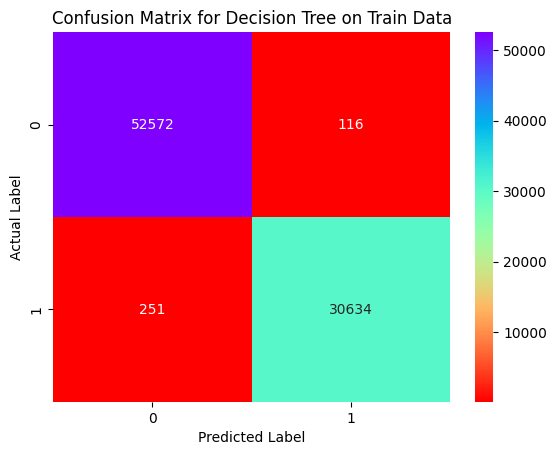

In [ ]:
# Confusion Matrix for train data
print('Confusion Matrix for Decision Tree on Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred_dt),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Decision Tree on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Decidion Tree on Train Data")
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_dt)
roc_auc_dt = auc(fpr, tpr)

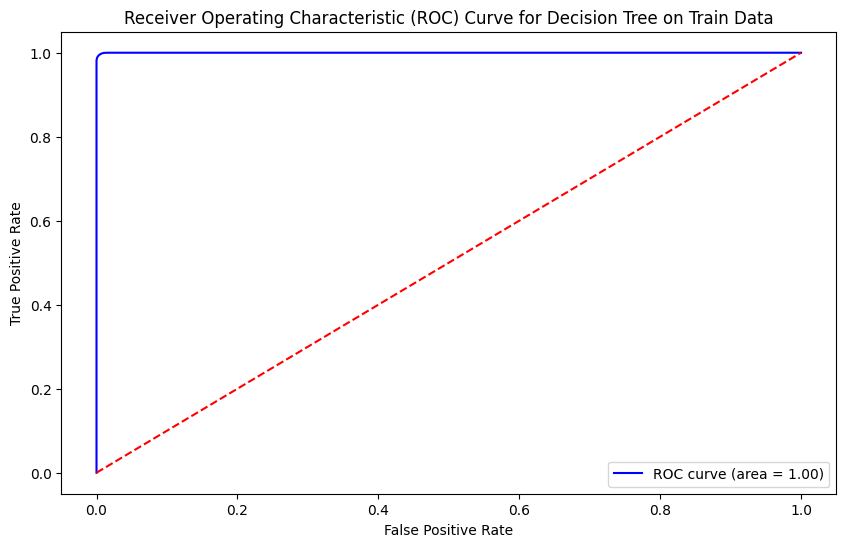

AUC: 0.9999464833371605


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree on Train Data')
plt.legend(loc="lower right")
plt.savefig("ROC Curve for Decision Tree on Train Data")
plt.show()
print(f"AUC: {roc_auc_dt}")

In [ ]:
# Classification Report for test set
class_report_dttest = classification_report(y_test, y_pred_dttest)
print("Classification Report:\n", class_report_dttest)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     22478
           1       0.80      0.80      0.80     13339

    accuracy                           0.85     35817
   macro avg       0.84      0.84      0.84     35817
weighted avg       0.85      0.85      0.85     35817



Confusion Matrix for Decision Tree on Test Data


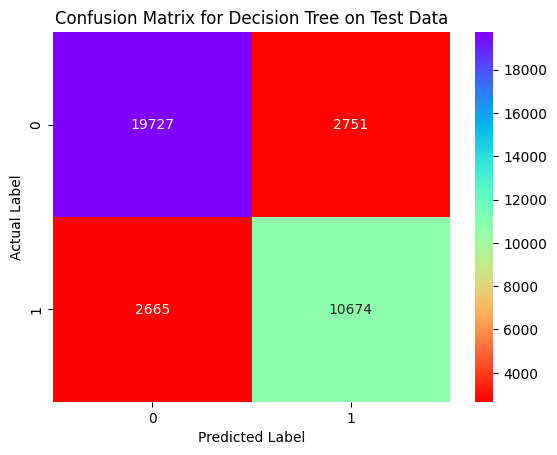

In [ ]:
# Confusion Matrix for test data
print('Confusion Matrix for Decision Tree on Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_dttest),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Decision Tree on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Decision Tree on Test Data")
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_dt)
roc_auc_test_dt = auc(fpr, tpr)

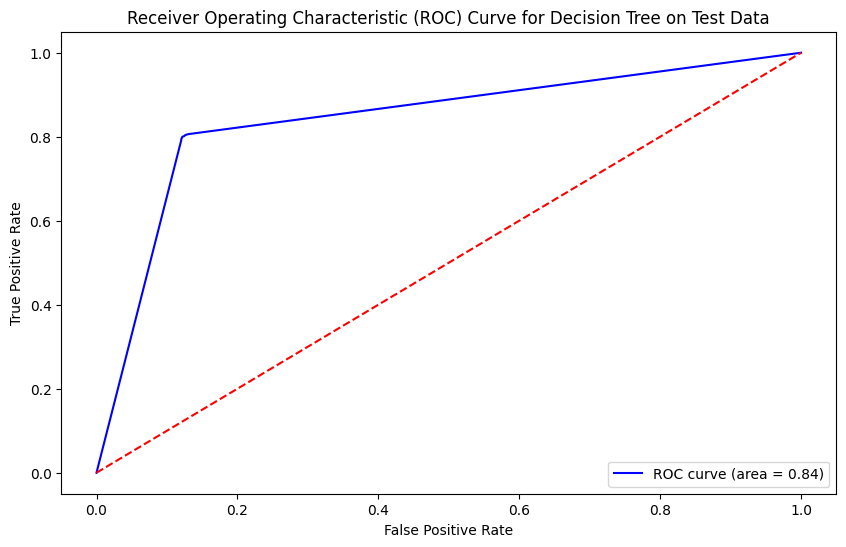

AUC: 0.8410627286277254


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_dt)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree on Test Data')
plt.legend(loc="lower right")
plt.savefig("ROC Curve for Decision Tree on Test Data")
plt.show()
print(f"AUC: {roc_auc_test_dt}")

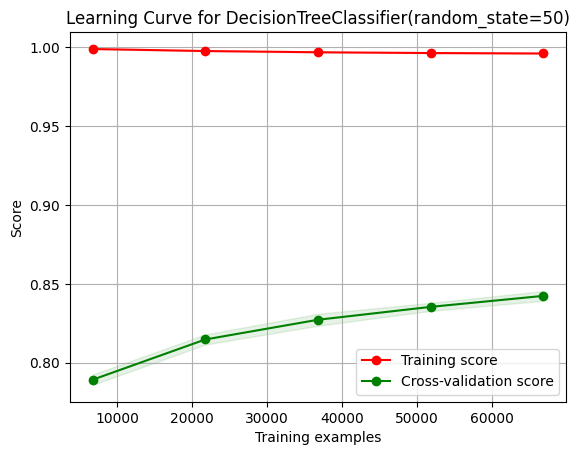

In [ ]:
plot_learning_curve(dt, X_train, y_train)

#Decision Tree with Feature Selection

In [14]:
# Feature Importance
dt_feature_scores = pd.Series(dt.feature_importances_, index=X_train. columns).sort_values(ascending=False)
dt_feature_scores

,0
deposit_type,0.234682
country,0.107927
booking_day,0.063127
arrival_day,0.057967
totalno_of_special_requests,0.051546
market_segment,0.050191
agent,0.044515
booking_month,0.041309
arrival_month,0.038152
stays_in_week_nights,0.037749


In [15]:
dt_feature_scores.to_csv('/content/Decision_Tree_FI.csv')

In [16]:
X_train_dtf = X_train.drop(['days_in_waiting_list', 'is_repeated_customer', 'distribution_channel', 'previous_bookings_not_canceled', 'hotel','children'], axis = 1 )
X_test_dtf = X_test.drop(['days_in_waiting_list', 'is_repeated_customer', 'distribution_channel', 'previous_bookings_not_canceled', 'hotel','children'], axis = 1 )

In [17]:
dt_f = DecisionTreeClassifier(random_state=50).fit(X_train_dtf, y_train)

In [18]:
y_pred_dt_f = dt_f.predict(X_train_dtf)
y_pred_dttest_f = dt_f.predict(X_test_dtf)

In [19]:
y_pred_proba_dtf = dt_f.predict_proba(X_train_dtf)[:, 1]
y_pred_proba_test_dtf = dt_f.predict_proba(X_test_dtf)[:, 1]

In [ ]:
# Classification Report for train set
dtf_class_report = classification_report(y_train, y_pred_dt_f)
print("Classification Report:\n", dtf_class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52688
           1       1.00      0.99      0.99     30885

    accuracy                           1.00     83573
   macro avg       1.00      0.99      1.00     83573
weighted avg       1.00      1.00      1.00     83573



Confusion Matrix for Decision Tree With Feature Importance on Train Data


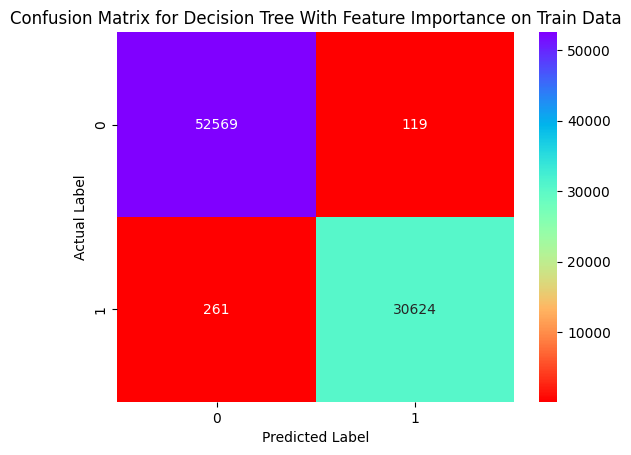

In [ ]:
# Confusion Matrix for train data
print('Confusion Matrix for Decision Tree With Feature Importance on Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred_dt_f),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Decision Tree With Feature Importance on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Decision Tree With Feature Importance on Train Data")
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_dtf)
roc_auc_dtf = auc(fpr, tpr)

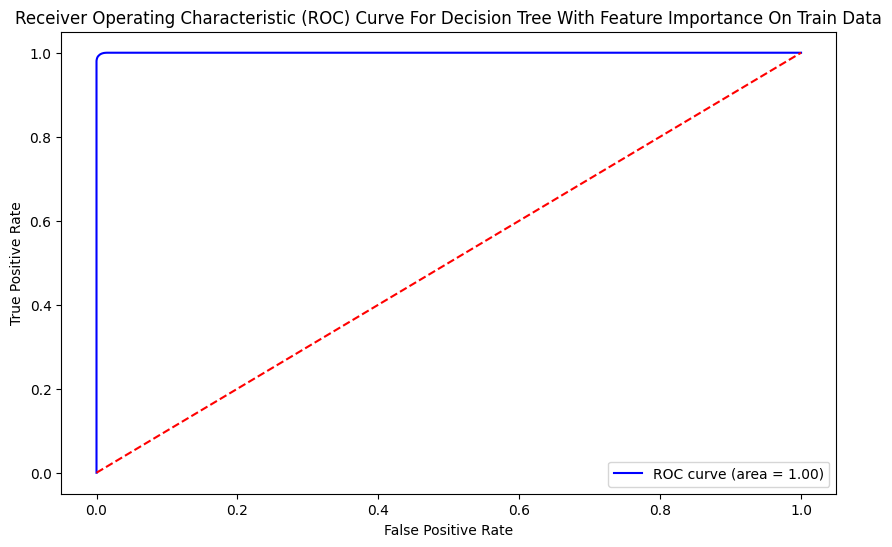

AUC: 0.9999428917364903


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_dtf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For Decision Tree With Feature Importance On Train Data')
plt.legend(loc="lower right")
plt.savefig("ROC Curve For Decision Tree With Feature Importance On Train Data")
plt.show()
print(f"AUC: {roc_auc_dtf}")

In [ ]:
# Classification Report for test set
dtf_class_report_test = classification_report(y_test, y_pred_dttest_f)
print("Classification Report:\n", dtf_class_report_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     22478
           1       0.79      0.80      0.80     13339

    accuracy                           0.85     35817
   macro avg       0.84      0.84      0.84     35817
weighted avg       0.85      0.85      0.85     35817



Confusion Matrix for Decision Tree With Feature Importance on Test Data


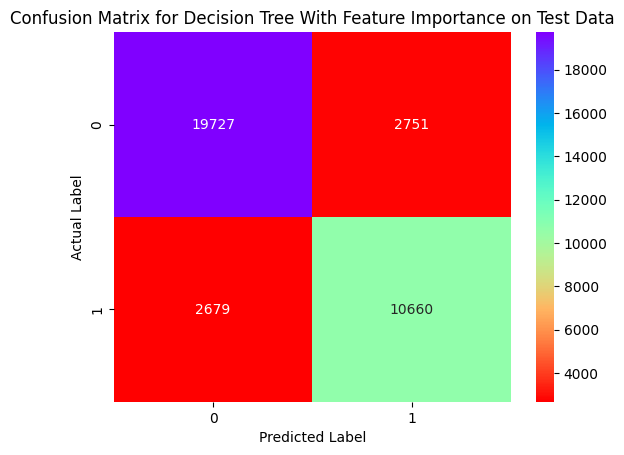

In [ ]:
# Confusion Matrix for test data
print('Confusion Matrix for Decision Tree With Feature Importance on Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_dttest_f),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Decision Tree With Feature Importance on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Decision Tree With Feature Importance on Test Data")
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_dtf)
roc_auc_test_dtf = auc(fpr, tpr)

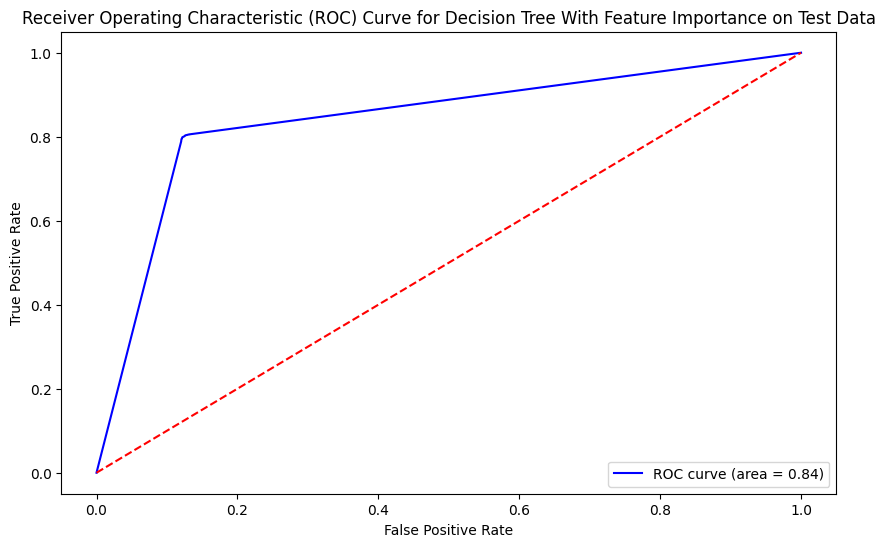

AUC: 0.8405357004125635


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_dtf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree With Feature Importance on Test Data')
plt.legend(loc="lower right")
plt.savefig("ROC Curve for Decision Tree With Feature Importance on Test Data")
plt.show()
print(f"AUC: {roc_auc_test_dtf}")

# Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=50).fit(X_train, y_train)

In [ ]:
y_pred_gb = gb.predict(X_train)
y_pred_gbtest = gb.predict(X_test)

In [ ]:
y_pred_proba_gb = gb.predict_proba(X_train)[:, 1]
y_pred_proba_testgb = gb.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report for train set
class_reportgb = classification_report(y_train, y_pred_gb)
print("Classification Report:\n", class_reportgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88     52688
           1       0.85      0.69      0.76     30885

    accuracy                           0.84     83573
   macro avg       0.84      0.81      0.82     83573
weighted avg       0.84      0.84      0.84     83573



Confusion Matrix for Gradient Boosting  on Train Data


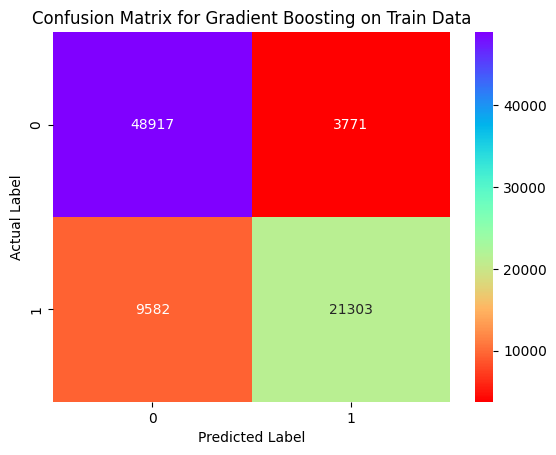

In [ ]:
# Confusion Matrix for train data
print('Confusion Matrix for Gradient Boosting  on Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred_gb),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Gradient Boosting on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for Gradient Boosting on Train Data.jpg')
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_gb)
roc_auc_gb = auc(fpr, tpr)

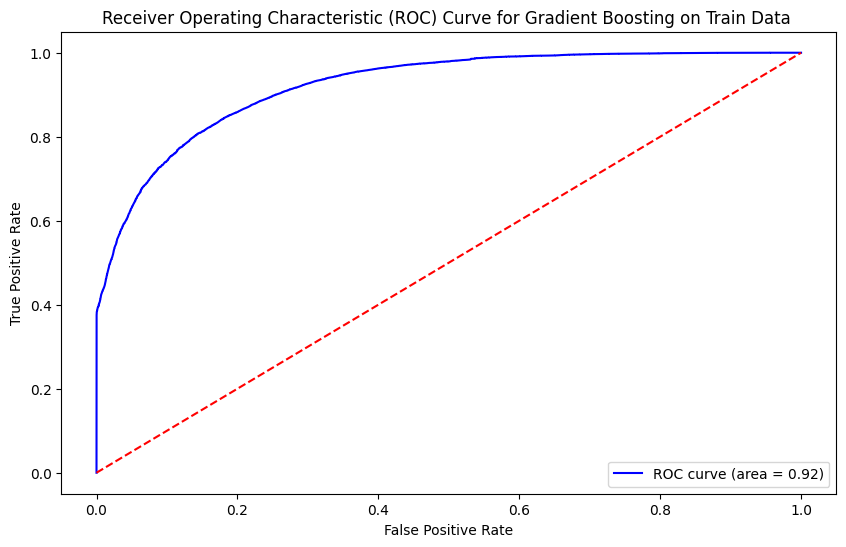

AUC: 0.920879661264093


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting on Train Data ')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for Gradient Boosting on Train Data.jpg')
plt.show()
print(f"AUC: {roc_auc_gb}")

In [ ]:
# Classification Report for test set
class_report_gbtest = classification_report(y_test, y_pred_gbtest)
print("Classification Report:\n", class_report_gbtest)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88     22478
           1       0.85      0.69      0.76     13339

    accuracy                           0.84     35817
   macro avg       0.84      0.81      0.82     35817
weighted avg       0.84      0.84      0.84     35817



Confusion Matrix for Gradient Boosting on Test Data


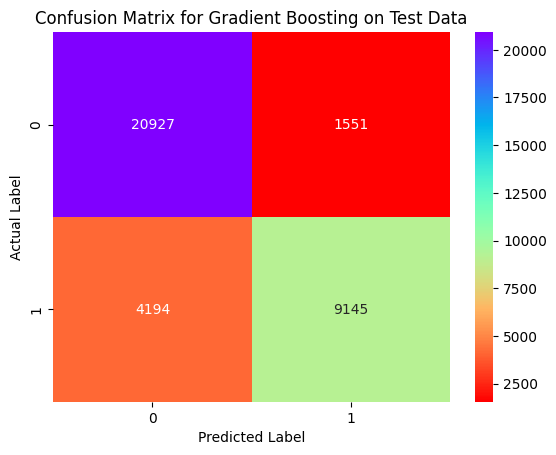

In [ ]:
# Confusion Matrix for test data
print('Confusion Matrix for Gradient Boosting on Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_gbtest),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Gradient Boosting on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for Gradient Boosting on Test Data.jpg')
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_testgb)
roc_auc_test_gb = auc(fpr, tpr)

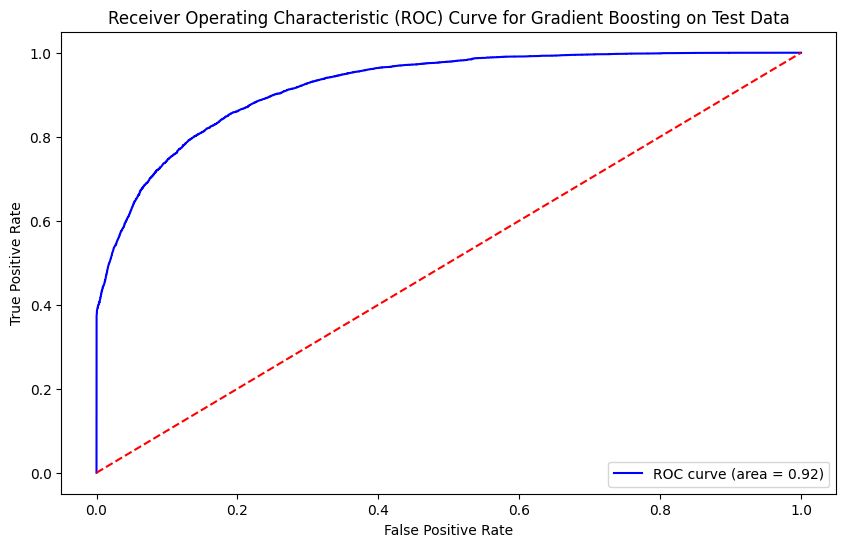

AUC: 0.920998043310906


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_gb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting on Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC for Gradient Boosting on Test Data.jpg')
plt.show()
print(f"AUC: {roc_auc_test_gb}")

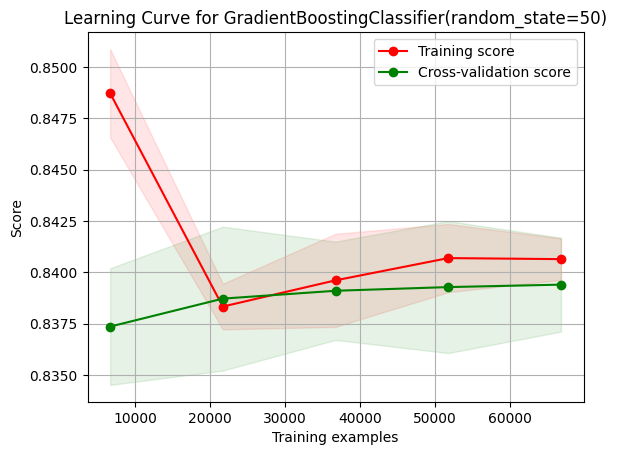

In [ ]:
plot_learning_curve(gb, X_train, y_train)

#Gradient Boosting With Feature Selection

In [ ]:
# Feature Importance
gb_feature_scores = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
gb_feature_scores

,0
deposit_type,0.442544
market_segment,0.103237
country,0.098463
totalno_of_special_requests,0.074309
previous_cancellations,0.048804
required_car_parking_spaces,0.046921
agent,0.045269
previous_bookings_not_canceled,0.020111
booking_changes,0.018898
stays_in_week_nights,0.016881


In [ ]:
gb_feature_scores.to_csv('/content/Gradient_Boosting_FI.csv')

In [ ]:
X_train_gbf = X_train.drop(['days_in_waiting_list','distribution_channel','meal','is_repeated_customer','hotel','booking_day', 'arrival_day_of_week', 'booking_day_of_week', 'arrival_day'],axis = 1)
X_test_gbf = X_test.drop(['days_in_waiting_list','distribution_channel','meal','is_repeated_customer','hotel','booking_day', 'arrival_day_of_week', 'booking_day_of_week', 'arrival_day'],axis = 1)

In [ ]:
gb_f = GradientBoostingClassifier(random_state=50).fit(X_train_gbf, y_train)

In [ ]:
y_pred_gbf = gb_f.predict(X_train_gbf)
y_pred_gbftest = gb_f.predict(X_test_gbf)

In [ ]:
y_pred_proba_gbf = gb_f.predict_proba(X_train_gbf)[:, 1]
y_pred_proba_test_gbf = gb_f.predict_proba(X_test_gbf)[:, 1]

In [ ]:
# Classification Report for train set
class_reportgbf = classification_report(y_train, y_pred_gbf)
print("Classification Report:\n", class_reportgbf)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88     52688
           1       0.85      0.69      0.76     30885

    accuracy                           0.84     83573
   macro avg       0.84      0.81      0.82     83573
weighted avg       0.84      0.84      0.84     83573



Confusion Matrix for Gradient Boosting With Feature Importance on Train Data


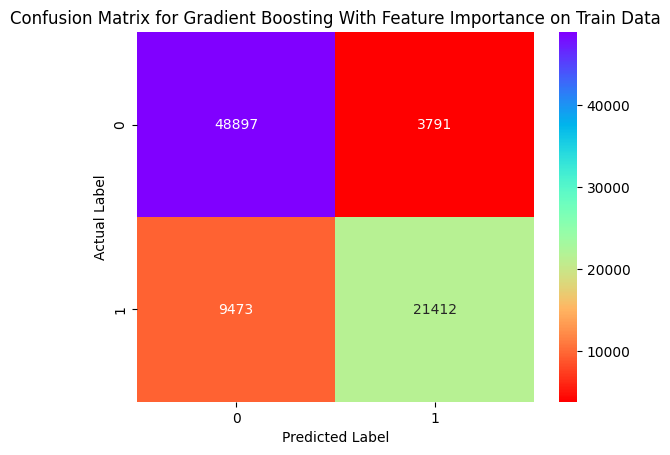

In [ ]:
# Confusion Matrix for train data
print('Confusion Matrix for Gradient Boosting With Feature Importance on Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred_gbf),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Gradient Boosting With Feature Importance on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for Gradient Boosting With Feature Importance on Train Data')
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_gbf)
roc_auc_gbf = auc(fpr, tpr)

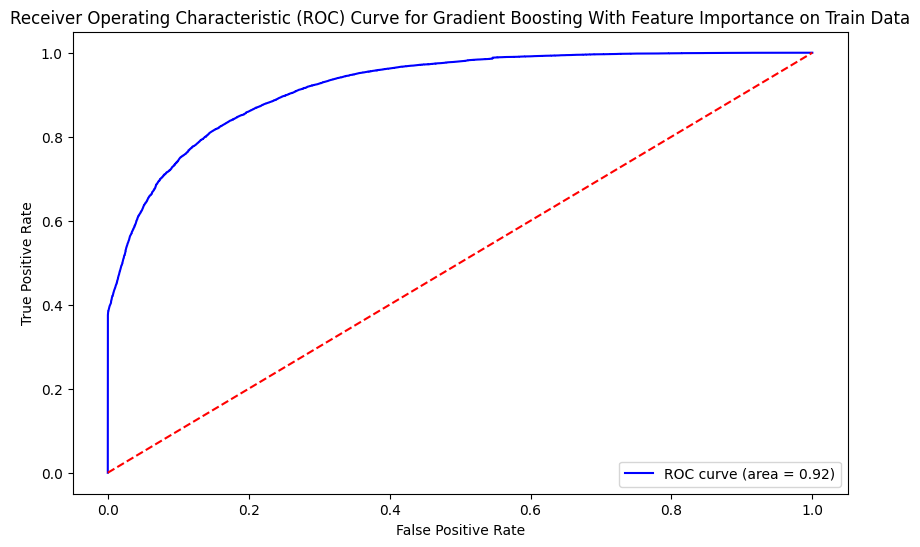

AUC: 0.9208728071417429


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_gbf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting With Feature Importance on Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC for Gradient Boosting With Feature Importance on Train Data')
plt.show()
print(f"AUC: {roc_auc_gbf}")

In [ ]:
# Classification Report for test set
class_report_gbftest = classification_report(y_test, y_pred_gbftest)
print("Classification Report:\n", class_report_gbftest)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88     22478
           1       0.85      0.69      0.76     13339

    accuracy                           0.84     35817
   macro avg       0.84      0.81      0.82     35817
weighted avg       0.84      0.84      0.84     35817



Confusion Matrix for Gradient Boosting With Feature Importance on Test Data


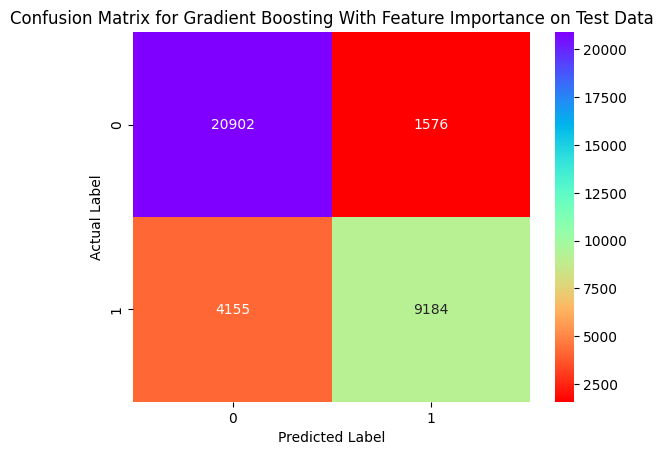

In [ ]:
# Confusion Matrix for test data
print('Confusion Matrix for Gradient Boosting With Feature Importance on Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_gbftest),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Gradient Boosting With Feature Importance on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for Gradient Boosting With Feature Importance on Test Data')
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_gbf)
roc_auc_test_gbf = auc(fpr, tpr)

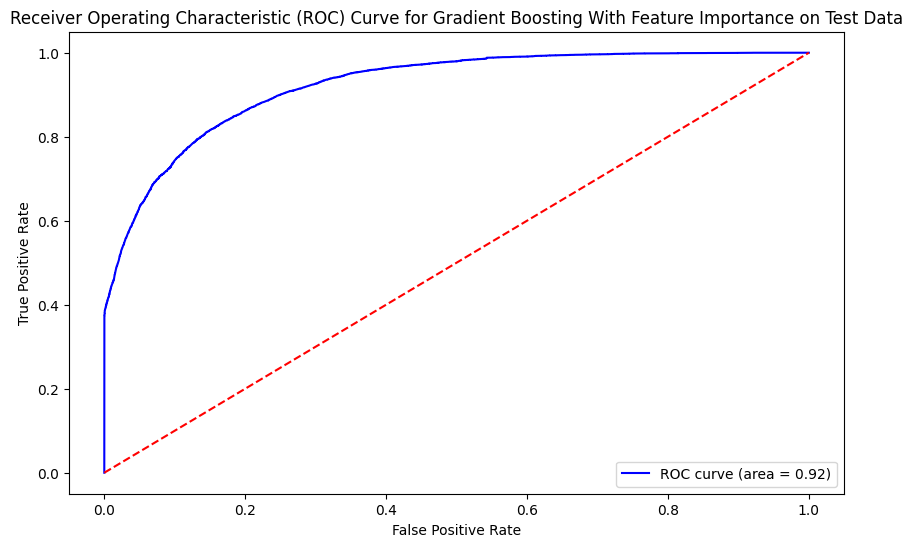

AUC: 0.9213127940956084


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_gbf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting With Feature Importance on Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for Gradient Boosting With Feature Importance on Test Data')
plt.show()
print(f"AUC: {roc_auc_test_gbf}")

# ADA Boost

In [20]:
ada = AdaBoostClassifier(random_state= 50).fit(X_train, y_train)

In [21]:
y_pred_ada = ada.predict(X_train)
y_pred_adatest = ada.predict(X_test)

In [22]:
y_pred_proba_ada = ada.predict_proba(X_train)[:, 1]
y_pred_proba_testada = ada.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report for train set
class_report_ada = classification_report(y_train, y_pred_ada)
print("Classification Report:\n", class_report_ada)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     52688
           1       0.82      0.64      0.72     30885

    accuracy                           0.81     83573
   macro avg       0.82      0.78      0.79     83573
weighted avg       0.82      0.81      0.81     83573



Confusion Matrix for ADA Boost on Train Data


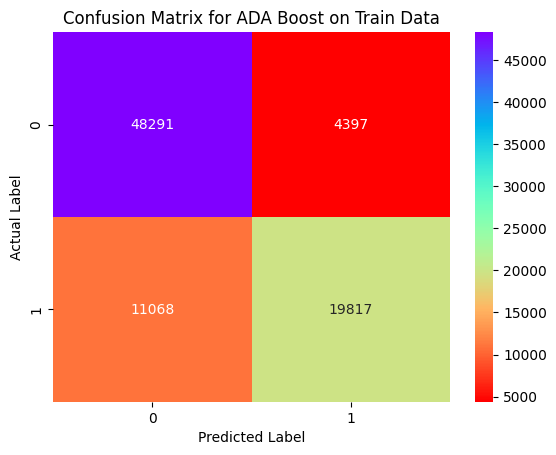

In [ ]:
# Confusion Matrix for train data
print('Confusion Matrix for ADA Boost on Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred_ada),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for ADA Boost on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for ADA Boost on Train Data')
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_ada)
roc_auc_ada = auc(fpr, tpr)

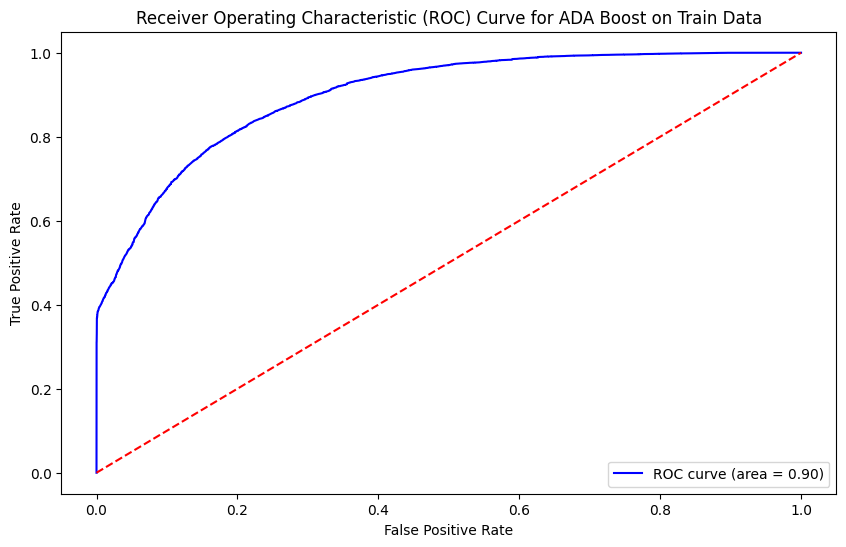

AUC: 0.8991971965935955


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ADA Boost on Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for ADA Boost on Train Data')
plt.show()
print(f"AUC: {roc_auc_ada}")

In [ ]:
# Classification Report for test set
class_report_testada = classification_report(y_test, y_pred_adatest)
print("Classification Report:\n", class_report_testada)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     22478
           1       0.83      0.64      0.72     13339

    accuracy                           0.82     35817
   macro avg       0.82      0.78      0.79     35817
weighted avg       0.82      0.82      0.81     35817



Confusion Matrix for ADA Boost on Test Data


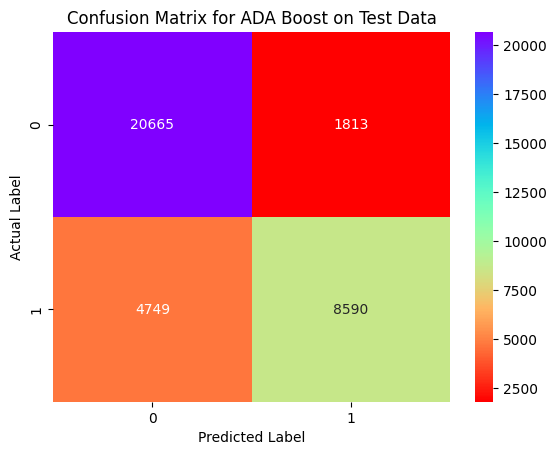

In [ ]:
# Confusion Matrix for test data
print('Confusion Matrix for ADA Boost on Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_adatest),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for ADA Boost on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for ADA Boost on Test Data')
plt.show()

In [ ]:
# ROC Curve and AUC for test set data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_testada)
roc_auc_testada = auc(fpr, tpr)

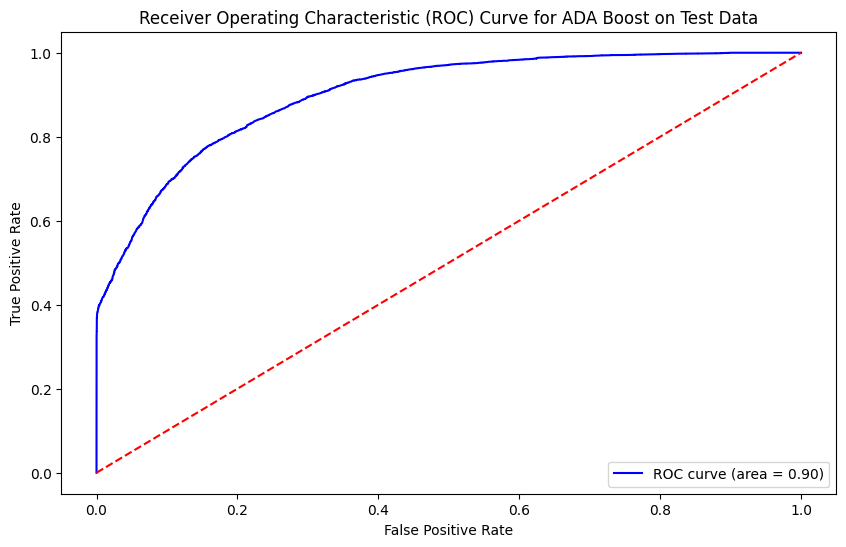

AUC: 0.9006743387063434


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_testada)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ADA Boost on Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for ADA Boost on Test Data')
plt.show()
print(f"AUC: {roc_auc_testada}")

#ADA Bosst With Feature Selection

In [ ]:
# Feature Importance
ada_feature_scores = pd.Series(ada.feature_importances_, index=X_train. columns).sort_values(ascending=False)
ada_feature_scores

,0
agent,0.18
country,0.12
assigned_room_type,0.08
deposit_type,0.06
totalno_of_special_requests,0.06
market_segment,0.06
arrival_year,0.06
previous_bookings_not_canceled,0.04
booking_year,0.04
customer_type,0.04


In [ ]:
ada_feature_scores.to_csv('/content/Ada_Boost_FI.csv')

In [ ]:
X_train_adaf = X_train.drop(['is_repeated_customer','distribution_channel','meal','days_in_waiting_list','hotel', 'booking_day', 'booking_day_of_week', 'arrival_day', 'arrival_day_of_week'], axis = 1)
X_test_adaf = X_test.drop(['is_repeated_customer','distribution_channel','meal','days_in_waiting_list','hotel', 'booking_day', 'booking_day_of_week', 'arrival_day', 'arrival_day_of_week'], axis = 1)

In [ ]:
ada_f = AdaBoostClassifier(random_state= 50).fit(X_train_adaf, y_train)

In [ ]:
y_pred_adaf = ada_f.predict(X_train_adaf)
y_pred_adaftest = ada_f.predict(X_test_adaf)

In [ ]:
y_pred_proba_adaf = ada_f.predict_proba(X_train_adaf)[:, 1]
y_pred_proba_test_adaf = ada_f.predict_proba(X_test_adaf)[:, 1]

In [ ]:
# Classification Report for train set
class_report_adaf = classification_report(y_train, y_pred_adaf)
print("Classification Report:\n", class_report_adaf)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     52688
           1       0.82      0.64      0.72     30885

    accuracy                           0.81     83573
   macro avg       0.82      0.78      0.79     83573
weighted avg       0.82      0.81      0.81     83573



Confusion Matrix for ADA Boost With Feature Importance on Train Data


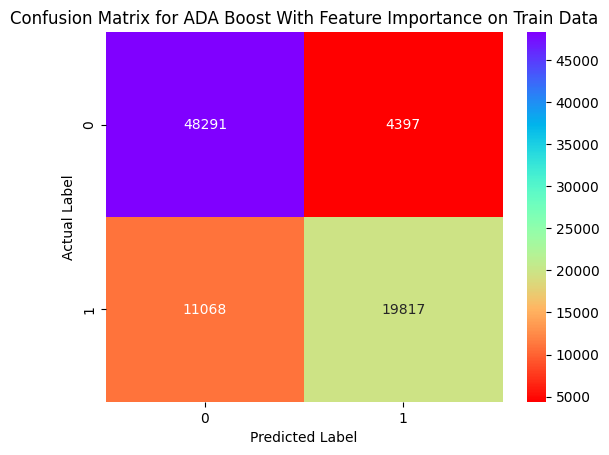

In [ ]:
# Confusion Matrix for train data
print('Confusion Matrix for ADA Boost With Feature Importance on Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred_adaf),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for ADA Boost With Feature Importance on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for ADA Boost With Feature Importance on Train Data')
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_adaf)
roc_auc_adaf = auc(fpr, tpr)

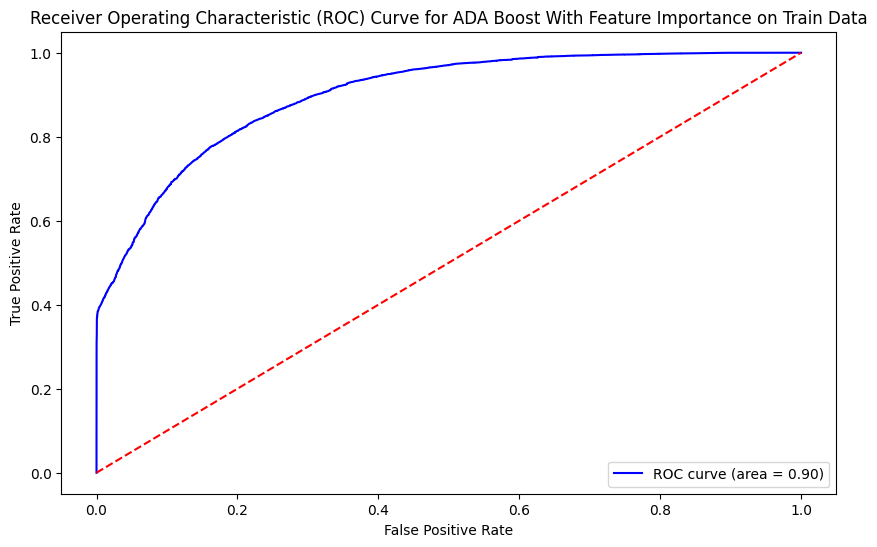

AUC: 0.8991971965935955


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_adaf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ADA Boost With Feature Importance on Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for ADA Boost With Feature Importance on Train Data')
plt.show()
print(f"AUC: {roc_auc_adaf}")

In [ ]:
# Classification Report for test set
class_report_testadaf = classification_report(y_test, y_pred_adaftest)
print("Classification Report:\n", class_report_testadaf)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     22478
           1       0.83      0.64      0.72     13339

    accuracy                           0.82     35817
   macro avg       0.82      0.78      0.79     35817
weighted avg       0.82      0.82      0.81     35817



Confusion Matrix for ADA Boost With Feature Importance on Test Data


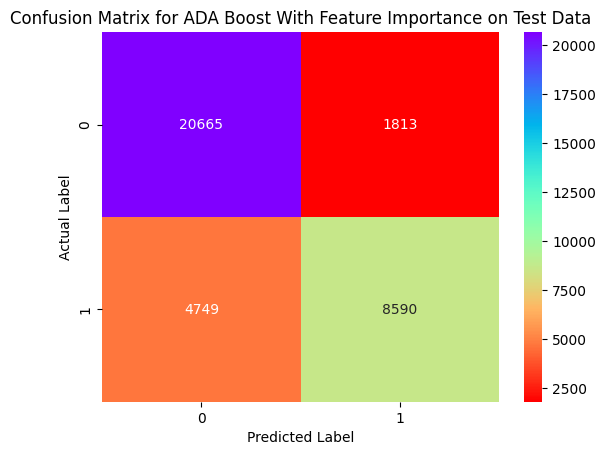

In [ ]:
# Confusion Matrix for test data
print('Confusion Matrix for ADA Boost With Feature Importance on Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_adaftest),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for ADA Boost With Feature Importance on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for ADA Boost With Feature Importance on Test Data')
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_adaf)
roc_auc_test_adaf = auc(fpr, tpr)

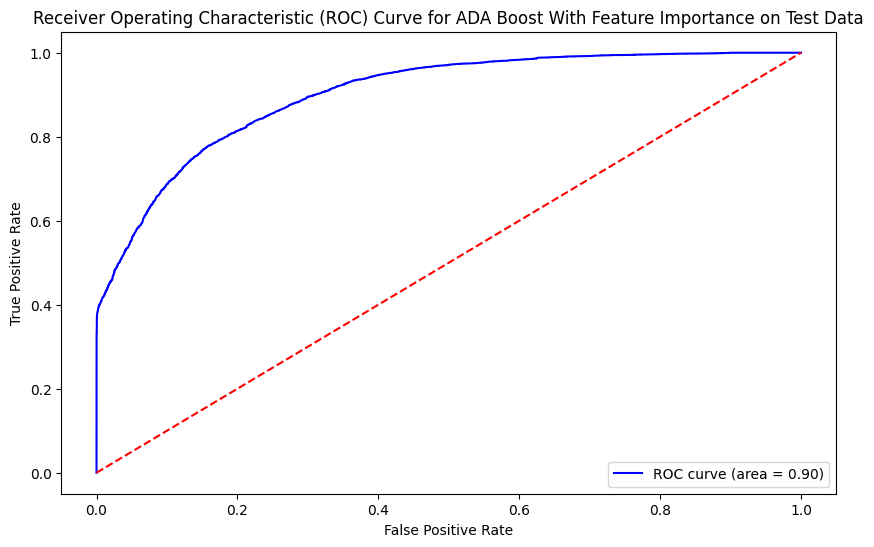

AUC: 0.9006743387063434


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_adaf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ADA Boost With Feature Importance on Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for ADA Boost With Feature Importance on Test Data')
plt.show()
print(f"AUC: {roc_auc_test_adaf}")

#XGBOOST

In [ ]:
xgb = XGBClassifier(random_state= 50).fit(X_train, y_train)

In [ ]:
y_pred_xgb = xgb.predict(X_train)
y_pred_xgbtest = xgb.predict(X_test)

In [ ]:
y_pred_proba_xgb = xgb.predict_proba(X_train)[:, 1]
y_pred_proba_xgbtest = xgb.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report for train set
class_report_xgb = classification_report(y_train, y_pred_xgb)
print("Classification Report:\n", class_report_xgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     52688
           1       0.88      0.84      0.86     30885

    accuracy                           0.90     83573
   macro avg       0.89      0.88      0.89     83573
weighted avg       0.90      0.90      0.90     83573



Confusion Matrix for XGBoost on Train Data


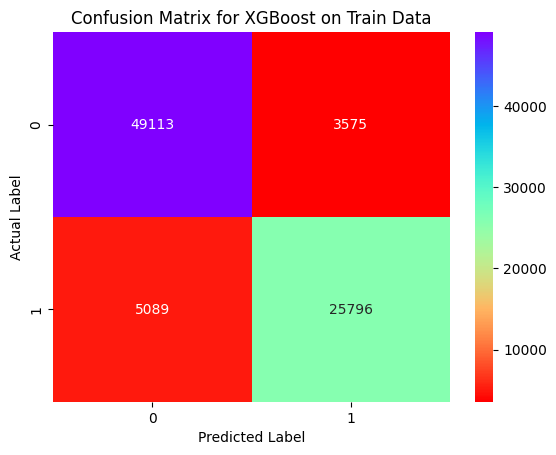

In [ ]:
# Confusion Matrix for train data
print('Confusion Matrix for XGBoost on Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred_xgb),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for XGBoost on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for XGBoost on Train Data')
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr, tpr)

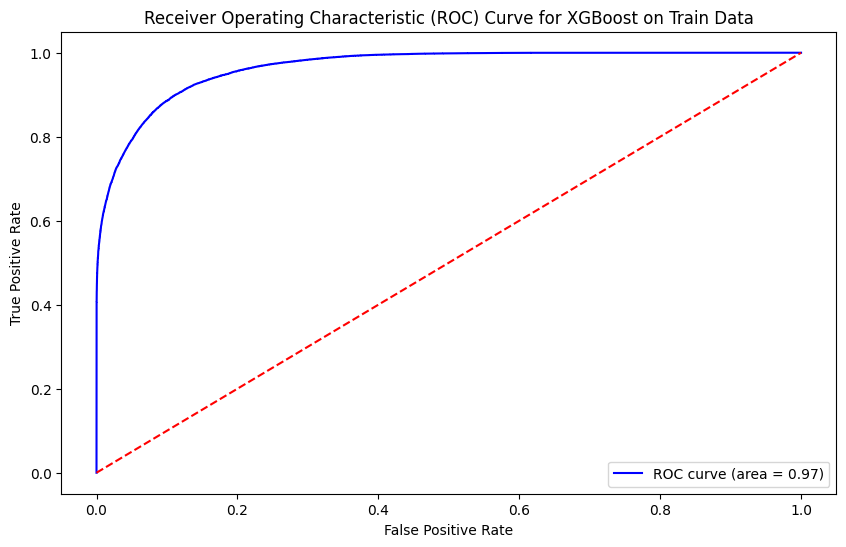

AUC: 0.9653349187136179


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost on Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for XGBoost on Train Data')
plt.show()
print(f"AUC: {roc_auc_xgb}")

In [ ]:
# Classification Report for test set
class_report_testxgb = classification_report(y_test, y_pred_xgbtest)
print("Classification Report:\n", class_report_testxgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91     22478
           1       0.86      0.81      0.84     13339

    accuracy                           0.88     35817
   macro avg       0.88      0.87      0.87     35817
weighted avg       0.88      0.88      0.88     35817



Confusion Matrix for XGBoost on Test Data


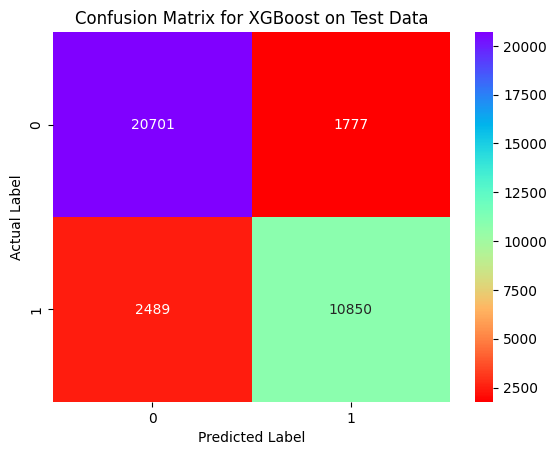

In [ ]:
# Confusion Matrix for test data
print('Confusion Matrix for XGBoost on Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_xgbtest),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for XGBoost on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for XGBoost on Test Data')
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgbtest)
roc_auc_testxgb = auc(fpr, tpr)

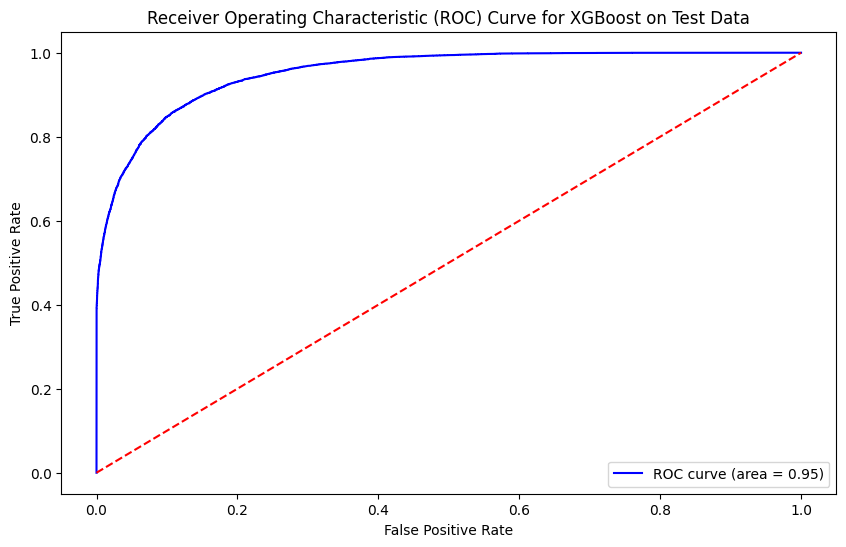

AUC: 0.9531686465408088


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_testxgb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost on Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for XGBoost on Test Data')
plt.show()
print(f"AUC: {roc_auc_testxgb}")

#XGBoost With Feature Selection

In [ ]:
# Feature Importance
xgb_feature_scores = pd.Series(xgb.feature_importances_, index=X_train. columns).sort_values(ascending=False)
xgb_feature_scores

,0
deposit_type,0.588053
required_car_parking_spaces,0.101792
previous_cancellations,0.053406
market_segment,0.032800
totalno_of_special_requests,0.026358
country,0.020456
previous_bookings_not_canceled,0.015435
customer_type,0.014535
arrival_year,0.013759
agent,0.013320


In [ ]:
xgb_feature_scores.to_csv('/content/XGBoost_FI.csv')

In [ ]:
X_train_xgbf = X_train.drop(['hotel','children','adults','arrival_month','meal','arrival_day','booking_day','booking_day_of_week','arrival_day_of_week'], axis = 1)
X_test_xgbf = X_test.drop(['hotel','children','adults','arrival_month','meal','arrival_day','booking_day','booking_day_of_week','arrival_day_of_week'], axis = 1)

In [ ]:
xgb_f = XGBClassifier(random_state= 50).fit(X_train_xgbf, y_train)

In [ ]:
y_pred_xgbf = xgb_f.predict(X_train_xgbf)
y_pred_xgbftest = xgb_f.predict(X_test_xgbf)

In [ ]:
y_pred_proba_xgbf = xgb_f.predict_proba(X_train_xgbf)[:, 1]
y_pred_proba_test_xgbf = xgb_f.predict_proba(X_test_xgbf)[:, 1]

In [ ]:
# Classification Report for train set
class_report_xgbf = classification_report(y_train, y_pred_xgbf)
print("Classification Report:\n", class_report_xgbf)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91     52688
           1       0.86      0.81      0.83     30885

    accuracy                           0.88     83573
   macro avg       0.87      0.86      0.87     83573
weighted avg       0.88      0.88      0.88     83573



Confusion Matrix for XGBoost With Feature Importance on Train Data


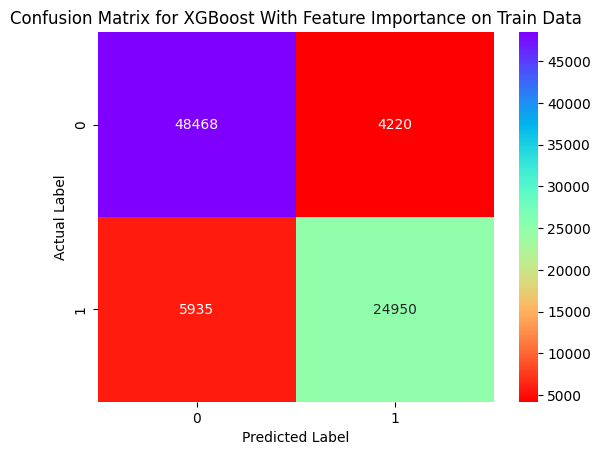

In [ ]:
print('Confusion Matrix for XGBoost With Feature Importance on Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred_xgbf),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for XGBoost With Feature Importance on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for XGBoost With Feature Importance on Train Data')
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_xgbf)
roc_auc_xgbf = auc(fpr, tpr)

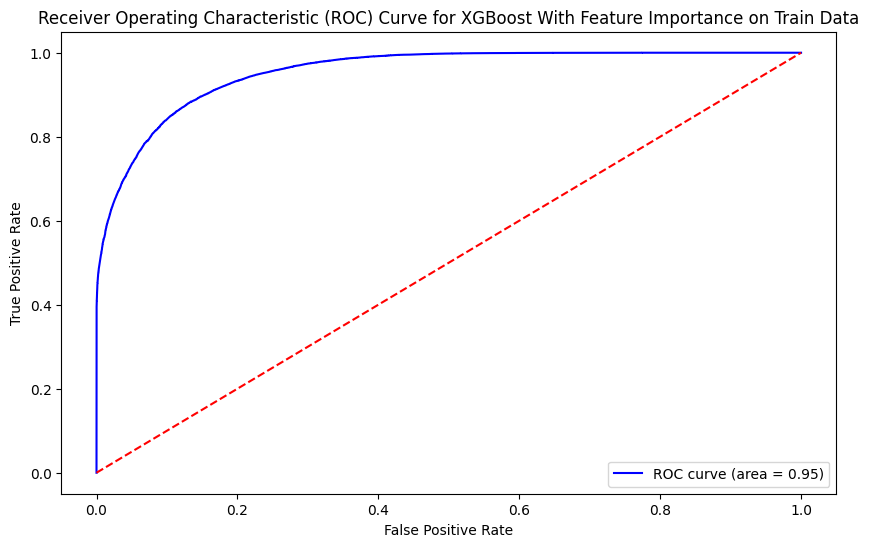

AUC: 0.953889450340868


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_xgbf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost With Feature Importance on Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for XGBoost With Feature Importance on Train Data')
plt.show()
print(f"AUC: {roc_auc_xgbf}")

In [ ]:
# Classification Report for test set
class_report_testxgbf = classification_report(y_test, y_pred_xgbftest)
print("Classification Report:\n", class_report_testxgbf)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90     22478
           1       0.84      0.80      0.82     13339

    accuracy                           0.87     35817
   macro avg       0.86      0.85      0.86     35817
weighted avg       0.87      0.87      0.87     35817



Confusion Matrix for XGBoost With Feature Importance on Test Data


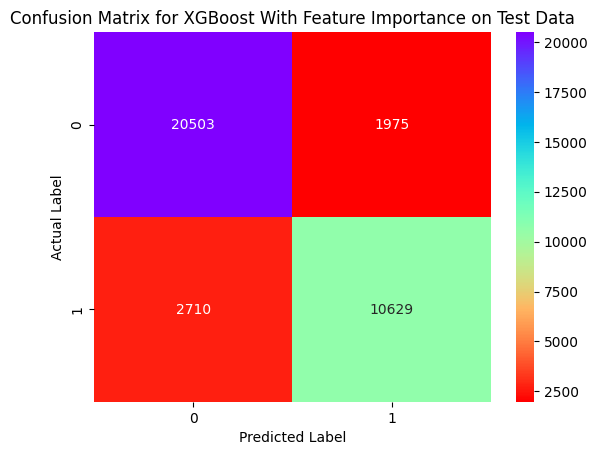

In [ ]:
print('Confusion Matrix for XGBoost With Feature Importance on Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_xgbftest),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for XGBoost With Feature Importance on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for XGBoost With Feature Importance on Test Data')
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_xgbf)
roc_auc_test_xgbf = auc(fpr, tpr)

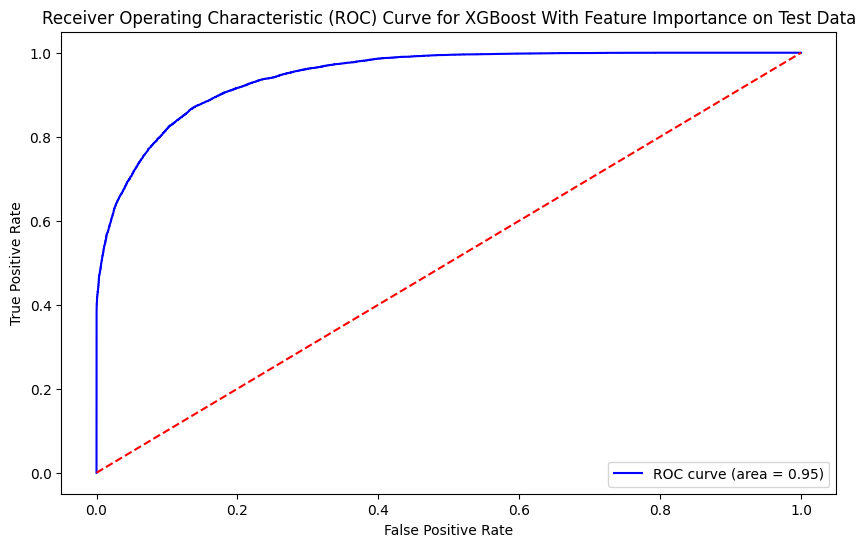

AUC: 0.9463955530439736


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_xgbf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost With Feature Importance on Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for XGBoost With Feature Importance on Test Data')
plt.show()
print(f"AUC: {roc_auc_test_xgbf}")

#XGBoost With GridSearchCV

In [ ]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [ ]:
xgb_grid_search = GridSearchCV(estimator = xgb, param_grid = xgb_param_grid, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [ ]:
# Print the best parameters and the best score
print(f"Best parameters: {xgb_grid_search.best_params_}")
#print(f"Best estimators: {xgb_grid_search.best_estimator_}")

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}


In [ ]:
xgb_grid = XGBClassifier(random_state= 50, colsample_bytree = 1.0, learning_rate = 0.2, max_depth = 7, n_estimators =300, subsample = 1.0 ).fit(X_train, y_train)

In [ ]:
y_pred_xgbg = xgb_grid.predict(X_train)
y_pred_xgbgtest = xgb_grid.predict(X_test)

In [ ]:
y_pred_proba_xgbg = xgb.predict_proba(X_train)[:, 1]
y_pred_proba_xgbgtest = xgb.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report for train set
class_report_xgbg = classification_report(y_train, y_pred_xgbg)
print("Classification Report:\n", class_report_xgbg)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     52688
           1       0.93      0.90      0.92     30885

    accuracy                           0.94     83573
   macro avg       0.94      0.93      0.93     83573
weighted avg       0.94      0.94      0.94     83573



Confusion Matrix for XGBoost With GridSearch on Train Data


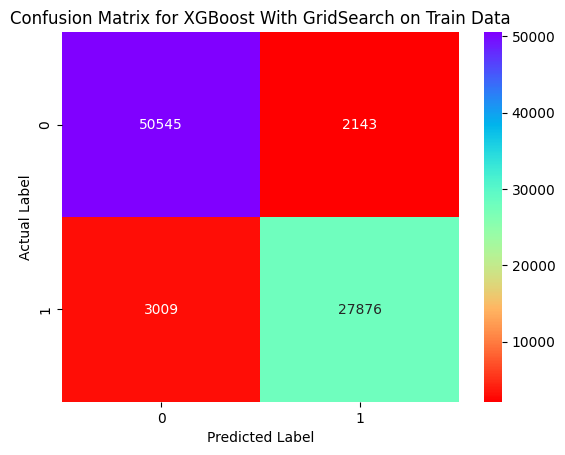

In [ ]:
print('Confusion Matrix for XGBoost With GridSearch on Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred_xgbg),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for XGBoost With GridSearch on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for XGBoost With GridSearch on Train Data')
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_xgbg)
roc_auc_xgbg = auc(fpr, tpr)

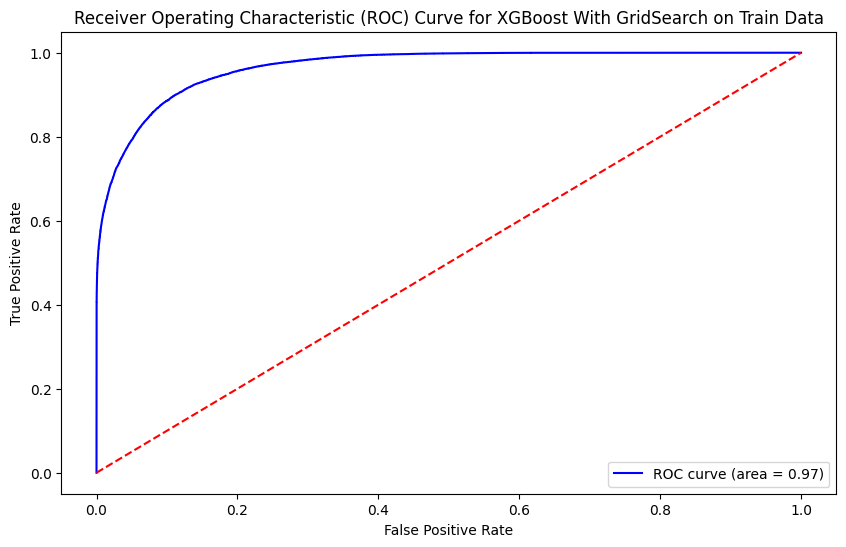

AUC: 0.9653349187136179


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_xgbg)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost With GridSearch on Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve For XGBoost With GridSearch on Train Data')
plt.show()
print(f"AUC: {roc_auc_xgbg}")

In [ ]:
# Classification Report for test set
class_report_testxgbg = classification_report(y_test, y_pred_xgbgtest)
print("Classification Report:\n", class_report_testxgbg)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     22478
           1       0.87      0.83      0.85     13339

    accuracy                           0.89     35817
   macro avg       0.89      0.88      0.88     35817
weighted avg       0.89      0.89      0.89     35817



Confusion Matrix for XGBoost With GridSearch on Test Data


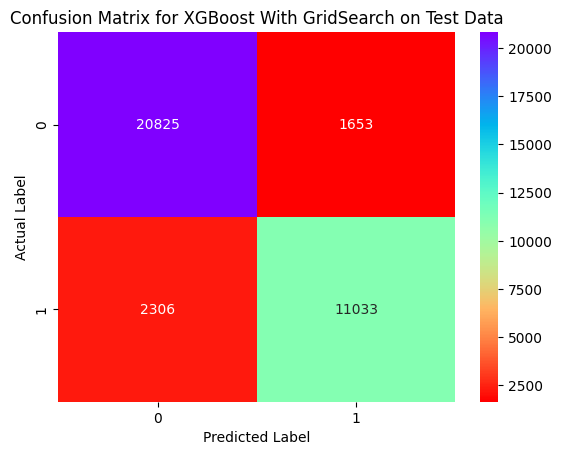

In [ ]:
print('Confusion Matrix for XGBoost With GridSearch on Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_xgbgtest),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for XGBoost With GridSearch on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for XGBoost With GridSearch on Test Data')
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgbgtest)
roc_auc_testxgbg = auc(fpr, tpr)

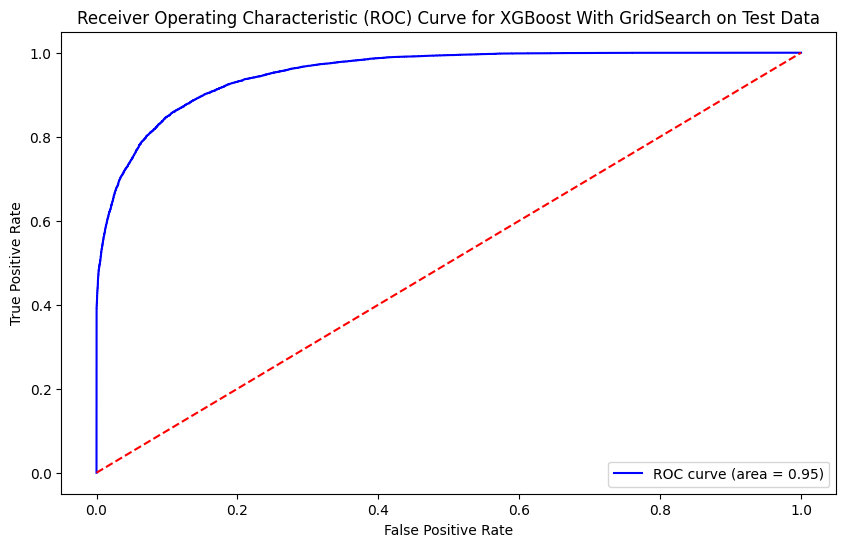

AUC: 0.9531686465408088


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_testxgbg)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost With GridSearch on Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for XGBoost With GridSearch on Test Data')
plt.show()
print(f"AUC: {roc_auc_testxgbg}")

#Shap Values

100%|===================| 23838/23878 [01:58<00:00]       

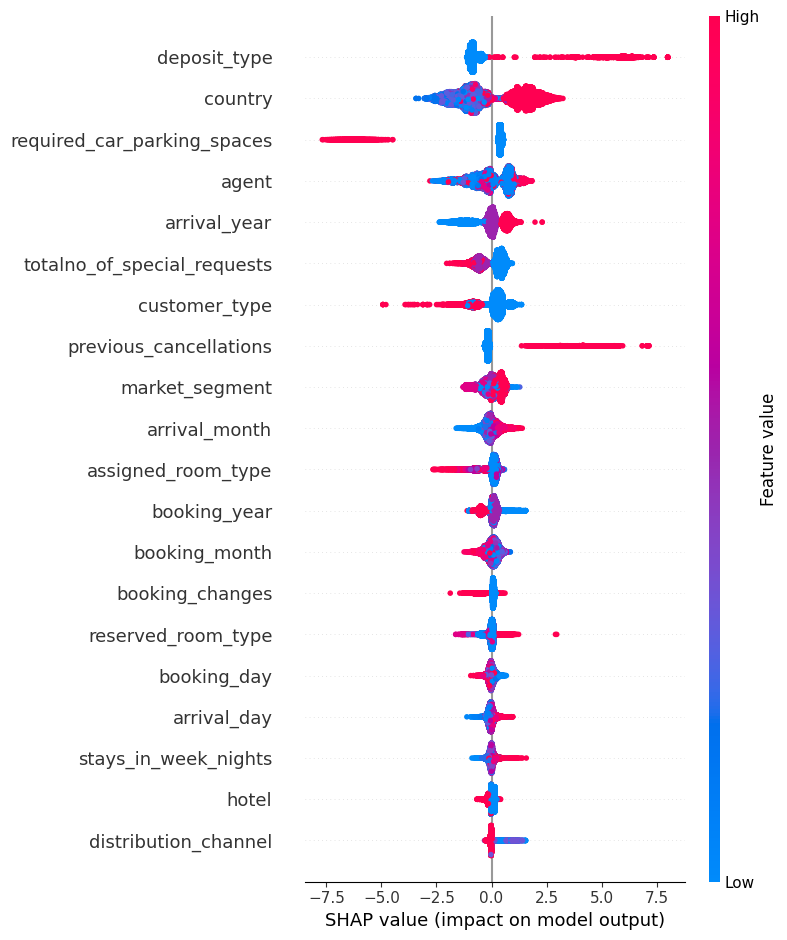

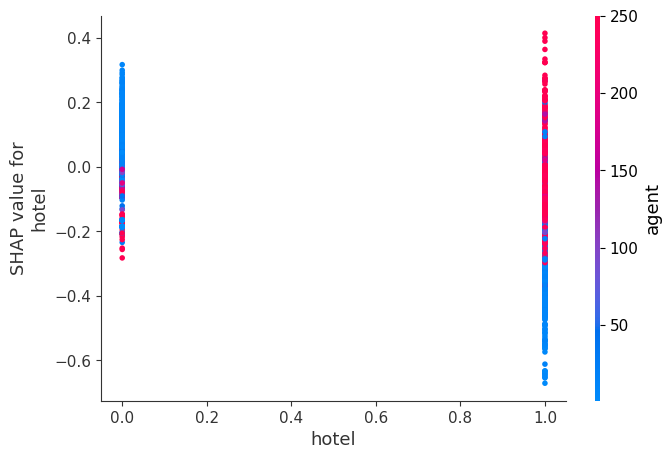

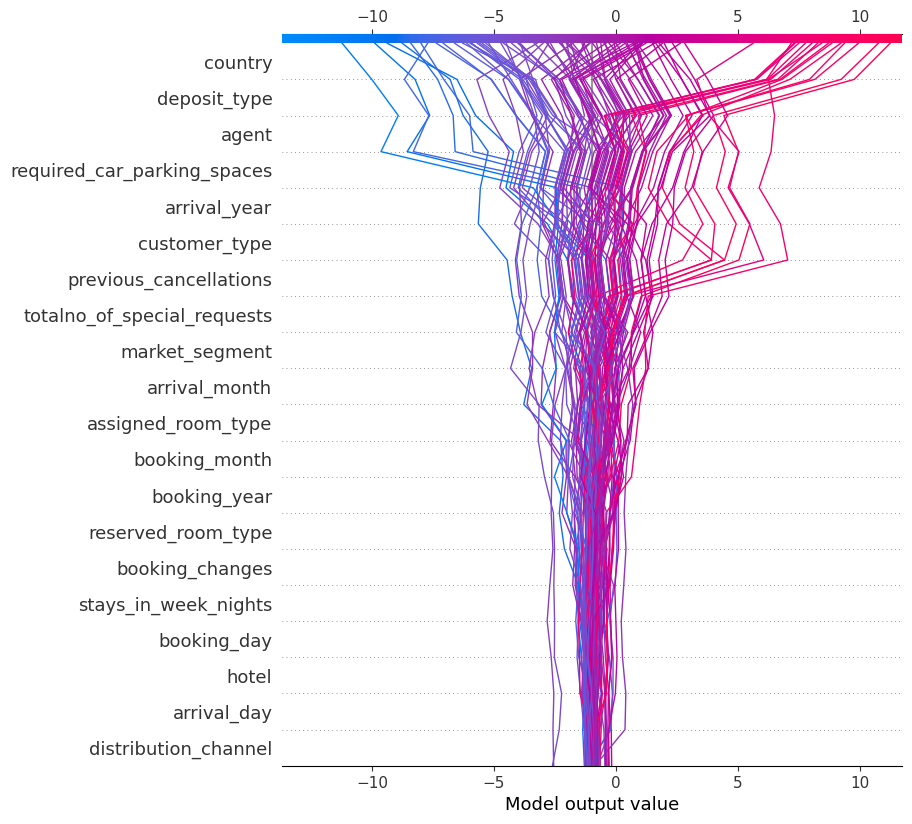

In [ ]:
data = edf
# Split the data into features and target
X = data.drop('is_canceled', axis=1)  # Assuming 'is_canceled' is the target variable
y = data['is_canceled']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Dependence plot for the first feature
shap.dependence_plot(0, shap_values.values, X_test)

# Force plot for the first prediction
shap.initjs()
shap.force_plot(shap_values.base_values[0], shap_values.values[0, :], X_test.iloc[0, :])

# Decision plot for the first 100 samples
shap.decision_plot(shap_values.base_values[0], shap_values.values[:100, :], X_test.iloc[:100, :])


#Voting Classifier
Between XGBoost, XGBoost With GridsearchCV & ADA Boost

In [23]:
m1 = XGBClassifier(random_state= 50).fit(X_train, y_train)

In [24]:
m2 = XGBClassifier(random_state= 50, colsample_bytree = 1.0, learning_rate = 0.2, max_depth = 7, n_estimators =300, subsample = 1.0 ).fit(X_train, y_train)

In [25]:
m3 = AdaBoostClassifier(random_state= 50).fit(X_train, y_train)

In [30]:
labels = ['XGBoost', 'XGBoost with GridsearchCV', 'ADA Boost']

In [31]:
#Create a Hard Voting Classifier
voting_m_hard = VotingClassifier(
 estimators=[
		(labels[0], m1), # Include the first classifier (XGBoost)
		(labels[1], m2), # Include the second classifier (XGBoost with GridsearchCV)
		(labels[2], m3), # Include the third classifier (ADA Boost)
	],
	voting='hard' # Specify hard voting, where the majority class prediction is chosen
)

In [32]:
# Create a Soft Voting Classifier
voting_m_soft = VotingClassifier(
	estimators=[
		(labels[0], m1), # Include the first classifier (XGBoost)
		(labels[1], m2), # Include the second classifier (XGBoost with GridsearchCV)
		(labels[2], m3), # Include the third classifier (ADA Boost)
	],
	voting='soft' # Specify soft voting, where class probabilities are combined
)


In [33]:
labels = ['XGBoost', 'XGBoost With GridsearchCV', 'ADA Boost',
			'Voting_Classifier_Hard', 'Voting_Classifier_Soft']

# Loop through the classifiers and perform 5-fold cross-validation for each
for m, labels in zip([m1, m2, m3], label):

	# Use cross_val_score to compute accuracy scores using 5-fold cross-validation
	scores = model_selection.cross_val_score(m, X_train, y_train, cv=5, scoring='accuracy')

	# Print the mean accuracy and standard deviation of accuracy for the current classifier
	print("Accuracy: %0.2f (+/- %0.2f) [%s]"
		% (scores.mean(), scores.std(), labels))


Accuracy: 0.88 (+/- 0.00) [XGBoost]
Accuracy: 0.88 (+/- 0.00) [XGBoost With GridsearchCV]
Accuracy: 0.81 (+/- 0.00) [ADA Boost]


In [34]:
voting_m_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=50, ...)),
                             ('ADA Boost',
                              AdaBoostClassifier(random_state=50))])

In [35]:
y_pred_stackhard = voting_m_hard.predict(X_train)
y_pred_stackhard_test = voting_m_hard.predict(X_test)

In [36]:
class_report_hard = classification_report(y_train, y_pred_stackhard)
print("Classification Report:\n", class_report_hard)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     52688
           1       0.90      0.84      0.87     30885

    accuracy                           0.91     83573
   macro avg       0.91      0.89      0.90     83573
weighted avg       0.91      0.91      0.91     83573



In [37]:
class_report_hard_test = classification_report(y_test, y_pred_stackhard_test)
print("Classification Report:\n", class_report_hard_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     22478
           1       0.88      0.80      0.84     13339

    accuracy                           0.88     35817
   macro avg       0.88      0.87      0.87     35817
weighted avg       0.88      0.88      0.88     35817



In [38]:
voting_m_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=50, ...)),
                             ('ADA Boost',
                              AdaBoostClassifier(random_state=50))],
                 voting='soft')

In [39]:
y_pred_stacksoft = voting_m_soft.predict(X_train)
y_pred_stacksoft_test = voting_m_soft.predict(X_test)

In [40]:
train_scores_soft = voting_m_soft.predict_proba(X_train)[:,1]
test_scores_soft = voting_m_soft.predict_proba(X_test)[:,1]

In [41]:
class_report_soft = classification_report(y_train, y_pred_stacksoft)
print("Classification Report:\n", class_report_soft)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     52688
           1       0.91      0.88      0.89     30885

    accuracy                           0.92     83573
   macro avg       0.92      0.91      0.92     83573
weighted avg       0.92      0.92      0.92     83573



In [42]:
class_report_soft_test = classification_report(y_test, y_pred_stacksoft_test)
print("Classification Report:\n", class_report_soft_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     22478
           1       0.87      0.82      0.85     13339

    accuracy                           0.89     35817
   macro avg       0.88      0.87      0.88     35817
weighted avg       0.89      0.89      0.89     35817



In [43]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

[0.00000000e+00 9.71345313e-05 1.78079974e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[0.         0.         0.         ... 0.99656468 0.99660264 1.        ]
[       inf 0.85149881 0.85077333 ... 0.10197379 0.10195802 0.09497344]
0.9793346598012739
Threshold value is: 0.4262647521632939


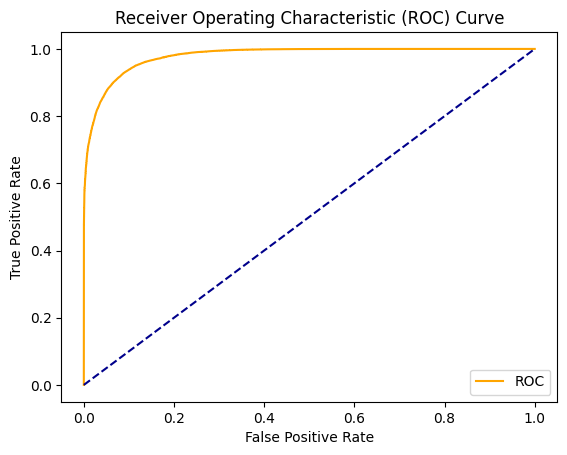

In [44]:
fpr, tpr, thresholds = roc_curve(y_train, train_scores_soft)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_train, train_scores_soft))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plt.savefig('ROC Curve for Soft Voting')
plot_roc_curve(fpr, tpr)

[0.00000000e+00 2.24904416e-04 1.79923532e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[0.         0.         0.         ... 0.99412759 0.99421657 1.        ]
[       inf 0.85149881 0.85077333 ... 0.10280422 0.10279954 0.09723951]
0.9793346598012739
Threshold value is: 0.4186213851255462


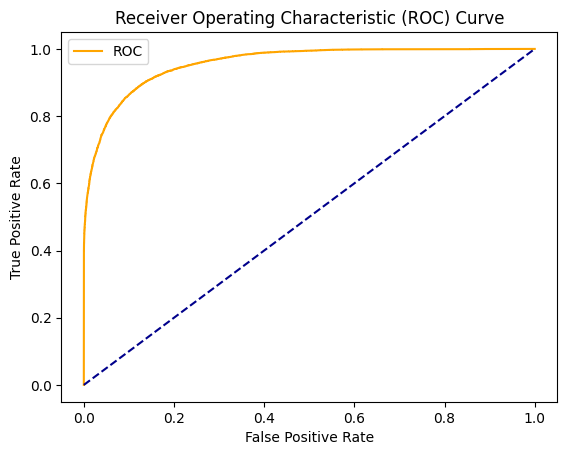

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, test_scores_soft)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_train, train_scores_soft))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [46]:
y_train_pred=[]
for i in range(0,len(train_scores_soft)):
    if np.array(train_scores_soft)[i]>0.4262647521632939:
        a=1
    else:
        a=0
    y_train_pred.append(a)

In [47]:
y_test_pred=[]
for i in range(0,len(test_scores_soft)):
    if np.array(test_scores_soft)[i]>0.4186213851255462:
        a=1
    else:
        a=0
    y_test_pred.append(a)

In [48]:
# Classification Report
class_report_trainsoft = classification_report(y_train, y_train_pred)
print("Classification Report:\n", class_report_trainsoft)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93     52688
           1       0.86      0.93      0.89     30885

    accuracy                           0.92     83573
   macro avg       0.91      0.92      0.91     83573
weighted avg       0.92      0.92      0.92     83573



In [49]:
# Classification Report
class_report_testsoft = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report_testsoft)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     22478
           1       0.81      0.89      0.85     13339

    accuracy                           0.88     35817
   macro avg       0.87      0.88      0.88     35817
weighted avg       0.89      0.88      0.88     35817



In [50]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_train_pred)
roc_auc_soft = auc(fpr, tpr)

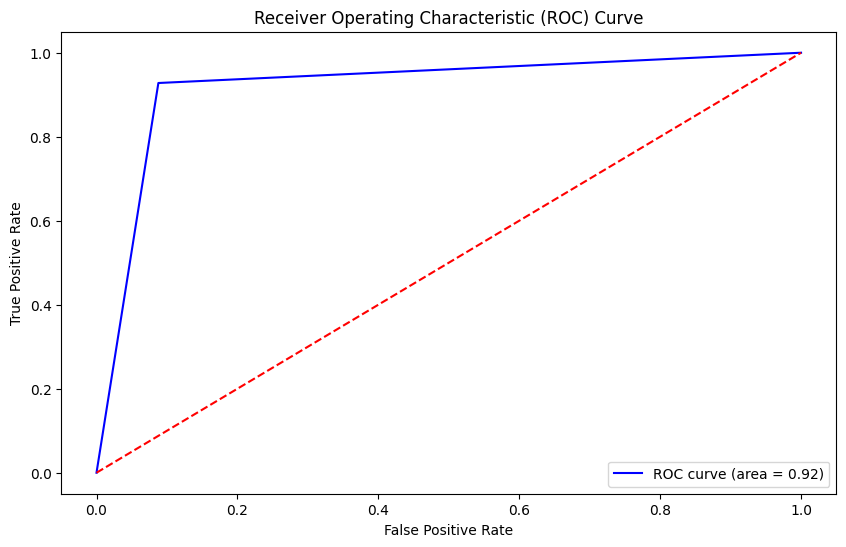

AUC: 0.9200374706975285


In [51]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_soft)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_soft}")

In [52]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc_softtest = auc(fpr, tpr)

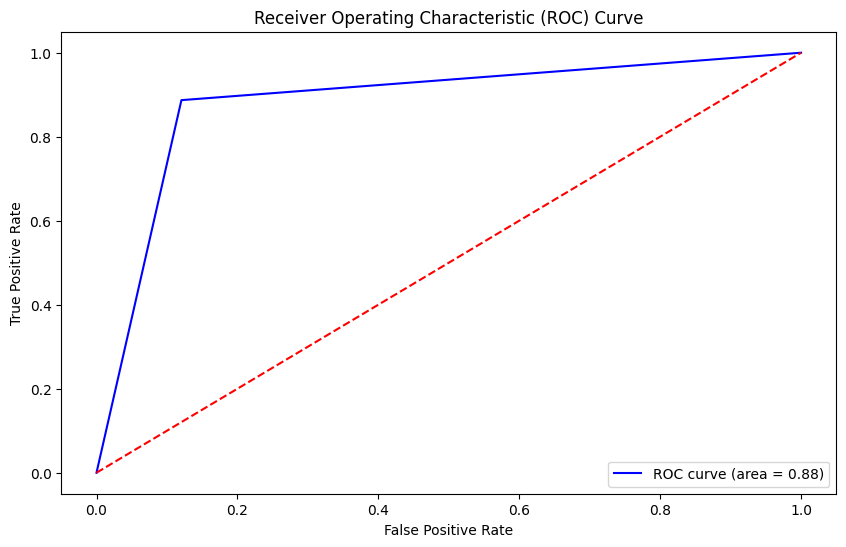

AUC: 0.8832900718458113


In [53]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_softtest)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_softtest}")

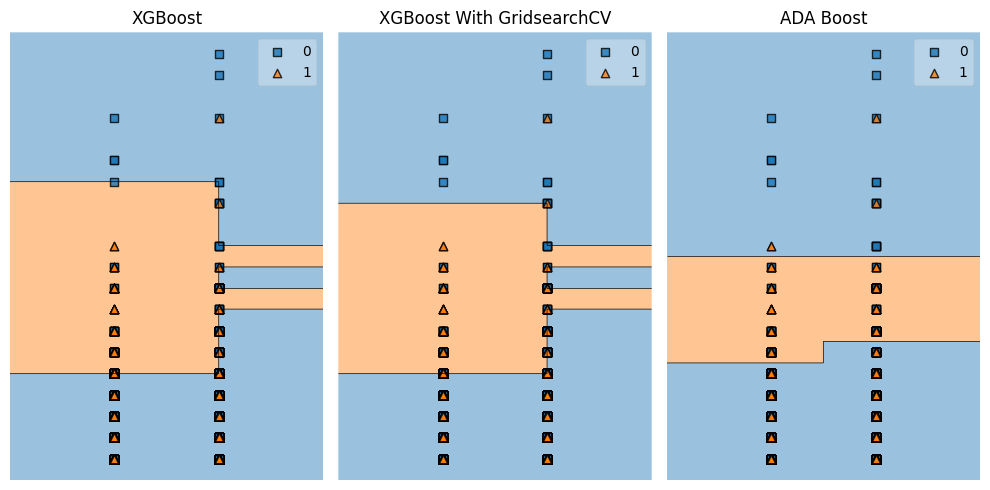

In [ ]:
# Select the first two features from X for plotting
X_array_2d = X_array[:, :2]

# Fit the classifiers with only two features
m1.fit(X_array_2d, y_array)
m2.fit(X_array_2d, y_array)
m3.fit(X_array_2d, y_array)

classifiers = [m1, m2, m3]
titles = ['XGBoost', 'XGBoost With GridsearchCV', 'ADA Boost']

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for m, title, ax in zip(classifiers, titles, axes.flatten()):
    plot_decision_regions(X_array_2d, y_array, clf=m, ax=ax)
    ax.set_title(title)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

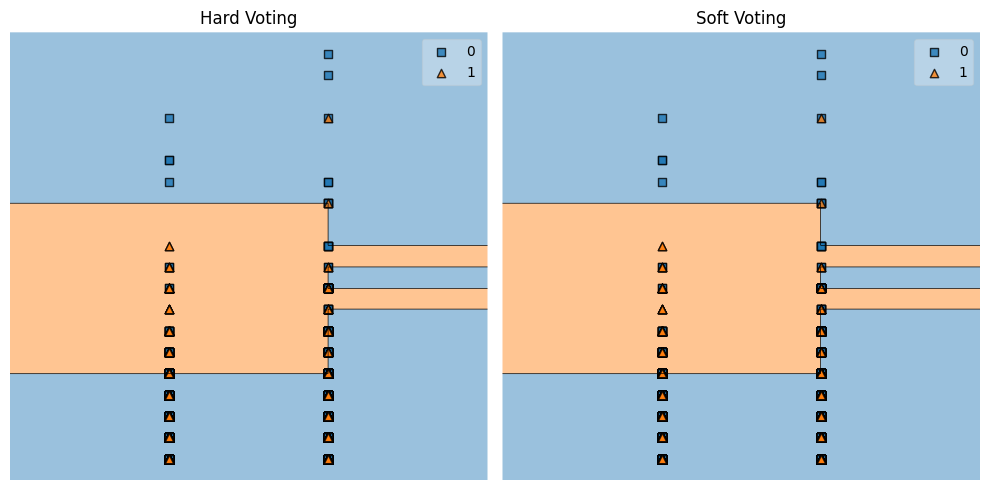

In [ ]:
# Convert X and y to NumPy arrays
X_array = X.values
y_array = y.values

# Select the first two features for plotting if there are more than 2 features
if X_array.shape[1] > 2:
    X_array = X_array[:, :2]

# Fit the classifiers
voting_m_hard.fit(X_array, y_array)
voting_m_soft.fit(X_array, y_array)

classifiers_vc = [voting_m_hard, voting_m_soft]
titles = ['Hard Voting', 'Soft Voting']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for m, title, ax in zip(classifiers_vc, titles, axes.flatten()):
    plot_decision_regions(X_array, y_array, clf=m, ax=ax)
    ax.set_title(title)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

#Voting Classifier
Between XGBoost, XGBoost With GridsearchCV & Decision Tree With Feature Importance  

In [54]:
m4 = DecisionTreeClassifier(random_state=50).fit(X_train, y_train)

In [56]:
labels_new = ['XGBoost', 'XGBoost With GridsearchCV', 'Decision Tree with GridsearchCV']

In [57]:
#Create a Hard Voting Classifier
voting_m_hard1 = VotingClassifier(
 estimators=[
		(labels[0], m1), # Include the first classifier (XGBoost)
		(labels[1], m2), # Include the second classifier (XGBoost with GridsearchCV)
		(labels[2], m4), # Include the third classifier (Decision Tree with GridsearchCV)
	],
	voting='hard' # Specify hard voting, where the majority class prediction is chosen
)

In [58]:
#Create a Soft Voting Classifier
voting_m_soft1 = VotingClassifier(
 estimators=[
		(labels[0], m1), # Include the first classifier (XGBoost)
		(labels[1], m2), # Include the second classifier (XGBoost with GridsearchCV)
		(labels[2], m4), # Include the third classifier (Decision Tree with GridsearchCV)
	],
	voting='soft' # Specify hard voting, where the majority class prediction is chosen
)

In [59]:
labels_new1 = ['XGBoost', 'XGBoost With GridsearchCV', 'Decision Tree with GridsearchCV',
			'Voting_Classifier_Hard', 'Voting_Classifier_Soft']

# Loop through the classifiers and perform 5-fold cross-validation for each
for m, label in zip([m1, m2, m4, voting_m_hard1, voting_m_soft1], labels_new1):

	# Use cross_val_score to compute accuracy scores using 5-fold cross-validation
	scores_1 = model_selection.cross_val_score(m, X_test, y_test, cv=5, scoring='accuracy')

	# Print the mean accuracy and standard deviation of accuracy for the current classifier
	print("Accuracy: %0.2f (+/- %0.2f) [%s]"
		% (scores_1.mean(), scores_1.std(), label))


Accuracy: 0.87 (+/- 0.01) [XGBoost]
Accuracy: 0.88 (+/- 0.01) [XGBoost With GridsearchCV]
Accuracy: 0.82 (+/- 0.00) [Decision Tree with GridsearchCV]
Accuracy: 0.88 (+/- 0.00) [Voting_Classifier_Hard]
Accuracy: 0.87 (+/- 0.00) [Voting_Classifier_Soft]


In [60]:
voting_m_hard1.fit(X_train, y_train)

VotingClassifier(estimators=[('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=50, ...)),
                             ('ADA Boost',
                              DecisionTreeClassifier(random_state=50))])

In [61]:
y_pred_hard1 = voting_m_hard1.predict(X_train)
y_pred_hard1_test = voting_m_hard1.predict(X_test)

In [62]:
class_report_hard1 = classification_report(y_train, y_pred_hard1)
print("Classification Report:\n", class_report_hard1)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     52688
           1       0.94      0.91      0.92     30885

    accuracy                           0.94     83573
   macro avg       0.94      0.94      0.94     83573
weighted avg       0.94      0.94      0.94     83573



In [63]:
class_report_hard1_test = classification_report(y_test, y_pred_hard1_test)
print("Classification Report:\n", class_report_hard1_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     22478
           1       0.87      0.83      0.85     13339

    accuracy                           0.89     35817
   macro avg       0.89      0.88      0.88     35817
weighted avg       0.89      0.89      0.89     35817



In [64]:
voting_m_soft1.fit(X_train, y_train)

VotingClassifier(estimators=[('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=50, ...)),
                             ('ADA Boost',
                              DecisionTreeClassifier(random_state=50))],
                 voting='soft')

In [65]:
y_pred_soft1 = voting_m_soft1.predict(X_train)
y_pred_soft1_test = voting_m_soft1.predict(X_test)

In [69]:
y_pred_proba_soft1 = voting_m_soft1.predict_proba(X_train)[:, 1]
y_pred_proba_soft1_test = voting_m_soft1.predict_proba(X_test)[:, 1]

In [66]:
class_report_soft1 = classification_report(y_train, y_pred_soft1)
print("Classification Report:\n", class_report_soft1)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     52688
           1       0.99      0.97      0.98     30885

    accuracy                           0.98     83573
   macro avg       0.98      0.98      0.98     83573
weighted avg       0.98      0.98      0.98     83573



Confusion Matrix for Voting Classifier - Soft Vote on Train Data


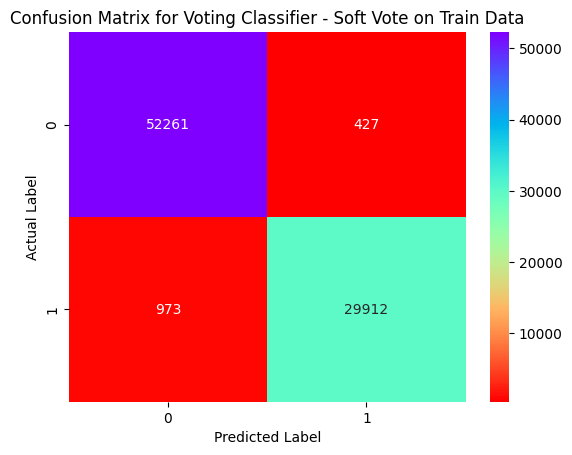

In [73]:
print('Confusion Matrix for Voting Classifier - Soft Vote on Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred_soft1),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Voting Classifier - Soft Vote on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for Voting Classifier - Soft Vote on Train Data')
plt.show()

In [67]:
class_report_soft1_test = classification_report(y_test, y_pred_soft1_test)
print("Classification Report:\n", class_report_soft1_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     22478
           1       0.86      0.82      0.84     13339

    accuracy                           0.88     35817
   macro avg       0.88      0.87      0.87     35817
weighted avg       0.88      0.88      0.88     35817



Confusion Matrix for Voting Classifier - Soft Vote on Test Data


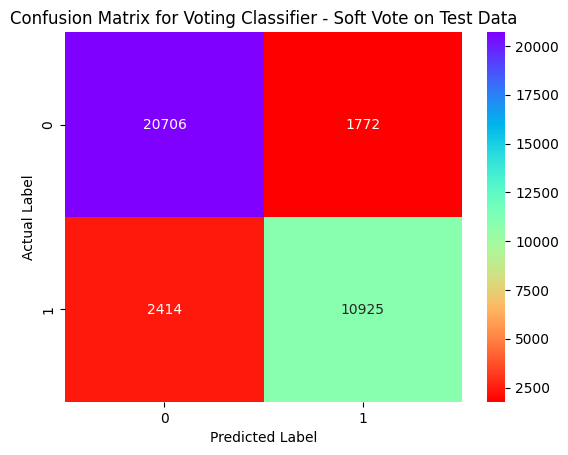

In [72]:
print('Confusion Matrix for Voting Classifier - Soft Vote on Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_soft1_test),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Voting Classifier - Soft Vote on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Confusion Matrix for Voting Classifier - Soft Vote on Test Data')
plt.show()

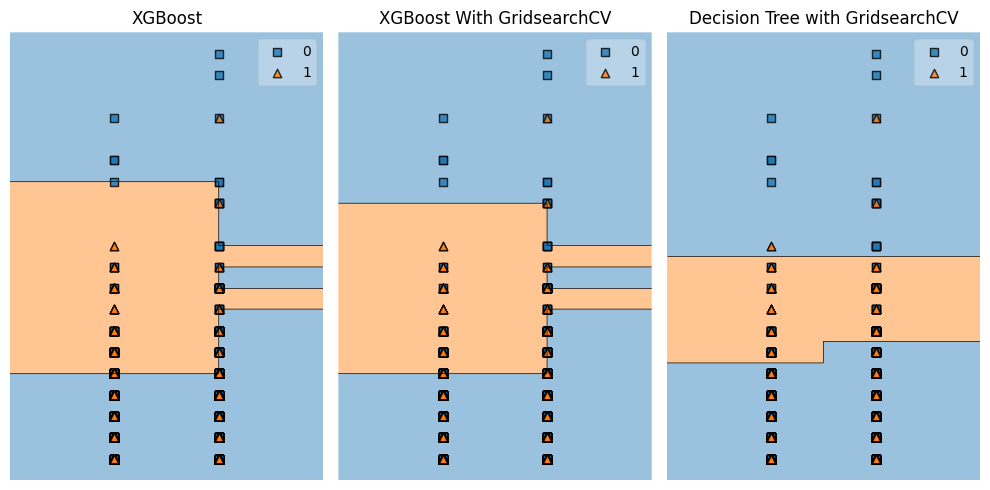

In [ ]:
# Select the first two features from X for plotting
X_array = X_array[:, :2]

# Fit the classifiers with only two features
m1.fit(X_array, y_array)
m2.fit(X_array, y_array)
m4.fit(X_array, y_array)

classifiers = [m1, m2, m3]
titles = ['XGBoost', 'XGBoost With GridsearchCV', 'Decision Tree with GridsearchCV']

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for m, title, ax in zip(classifiers, titles, axes.flatten()):
    plot_decision_regions(X_array_2d, y_array, clf=m, ax=ax)
    ax.set_title(title)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

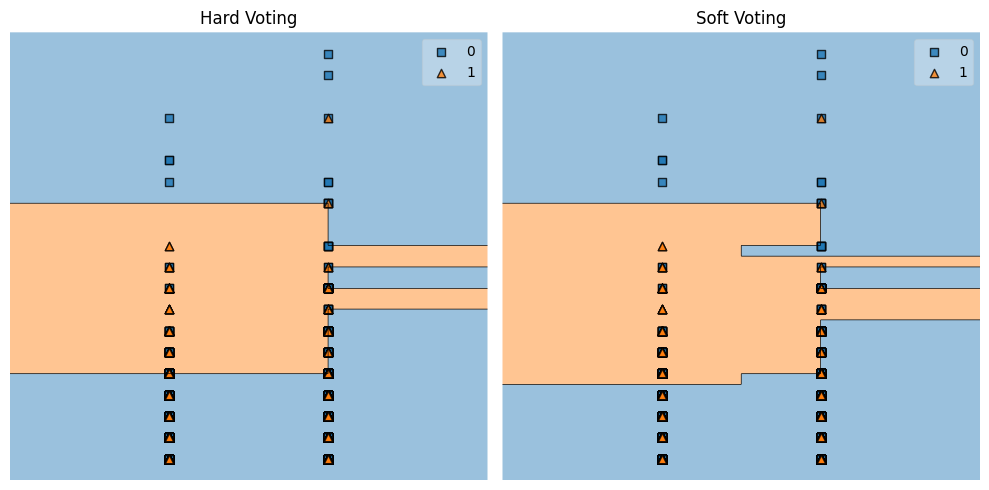

In [ ]:
# Convert X and y to NumPy arrays
X_array = X.values
y_array = y.values

# Select the first two features for plotting if there are more than 2 features
if X_array.shape[1] > 2:
    X_array = X_array[:, :2]

# Fit the classifiers
voting_m_hard1.fit(X_array, y_array)
voting_m_soft1.fit(X_array, y_array)

classifiers = [voting_m_hard1, voting_m_soft1]
titles = ['Hard Voting', 'Soft Voting']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for m, title, ax in zip(classifiers, titles, axes.flatten()):
    plot_decision_regions(X_array, y_array, clf=m, ax=ax)
    ax.set_title(title)
    ax.set_axis_off()

plt.tight_layout()
plt.show()


#Voting classifier soft voting is the best model

#Stacking

In [ ]:
# Define the base models
xgb_1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state = 50)
xgb_gs = XGBClassifier(random_state= 50, colsample_bytree = 1.0, learning_rate = 0.2, max_depth = 7, n_estimators =300, subsample = 1.0 )
ada =AdaBoostClassifier(random_state= 50)

In [ ]:
# Fit the GridSearchCV model separately
xgb_gs.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=50, ...)

In [ ]:
# Define the base models with fitted GridSearchCV model
base_models = [
    ('xgb', xgb_1),
    ('xgb_gs', xgb_gs),
    ('ada', ada),
   ]

In [ ]:
# Define the meta-model
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression()

In [ ]:
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None...
                                              learning_rate=0.2, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=7,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=50, ...)),
                               ('ada', AdaBoostClassifier(random_state=50))],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred_stack = stacking.predict(X_train)
y_pred_stack_test = stacking.predict(X_test)

In [ ]:
train_scores_stacked = stacking.predict_proba(X_train)[:,1]
test_scores_stacked = stacking.predict_proba(X_test)[:,1]

In [ ]:
class_report_stack = classification_report(y_train, y_pred_stack)
print("Classification Report:\n", class_report_stack)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     52688
           1       0.92      0.89      0.90     30885

    accuracy                           0.93     83573
   macro avg       0.93      0.92      0.92     83573
weighted avg       0.93      0.93      0.93     83573



In [ ]:
class_report_stack_test = classification_report(y_test, y_pred_stack_test)
print("Classification Report:\n", class_report_stack_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     22478
           1       0.87      0.83      0.85     13339

    accuracy                           0.89     35817
   macro avg       0.88      0.88      0.88     35817
weighted avg       0.89      0.89      0.89     35817



In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

[0.00000000e+00 9.71345313e-05 1.78079974e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[0.         0.         0.         ... 0.99669754 0.9967355  1.        ]
[       inf 0.98179285 0.98131314 ... 0.00370104 0.0036975  0.00287879]
0.9824469604556071
Threshold value is: 0.3157059573093065


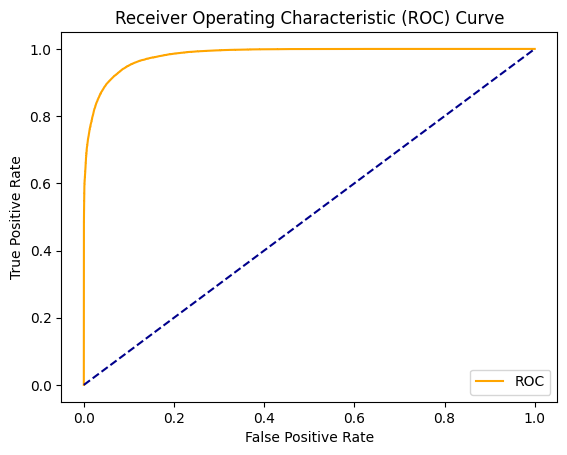

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, train_scores_stacked)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_train, train_scores_stacked))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

[0.00000000e+00 2.24904416e-04 1.79923532e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[0.         0.         0.         ... 0.99412759 0.99421657 1.        ]
[       inf 0.98179285 0.98131314 ... 0.0038243  0.00382246 0.00312169]
0.9578244087440878
Threshold value is: 0.30567314245655774


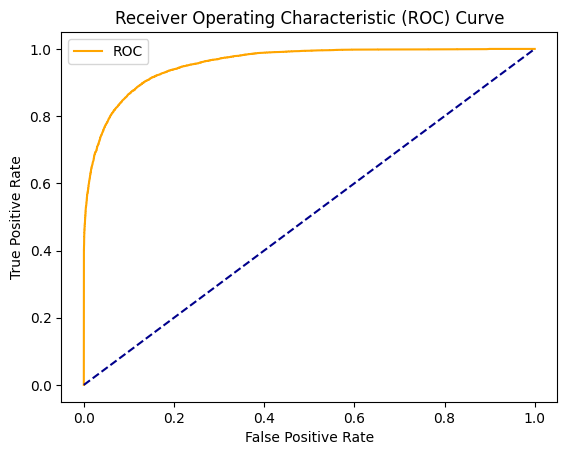

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, test_scores_stacked)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_test, test_scores_stacked))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [ ]:
y_train_predstacked=[]
for i in range(0,len(train_scores_stacked)):
    if np.array(train_scores_stacked)[i]>0.3157059573093065:
        a=1
    else:
        a=0
    y_train_predstacked.append(a)

In [ ]:
y_test_predstacked=[]
for i in range(0,len(test_scores_stacked)):
    if np.array(test_scores_stacked)[i]>0.30567314245655774:
        a=1
    else:
        a=0
    y_test_predstacked.append(a)

In [ ]:
# Classification Report
class_report_stacked = classification_report(y_train, y_train_predstacked)
print("Classification Report:\n", class_report_stacked)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94     52688
           1       0.87      0.94      0.90     30885

    accuracy                           0.92     83573
   macro avg       0.91      0.93      0.92     83573
weighted avg       0.93      0.92      0.92     83573



In [ ]:
# Classification Report
class_report_teststacked = classification_report(y_test, y_test_predstacked)
print("Classification Report:\n", class_report_teststacked)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     22478
           1       0.81      0.89      0.85     13339

    accuracy                           0.88     35817
   macro avg       0.87      0.88      0.88     35817
weighted avg       0.89      0.88      0.88     35817



In [ ]:
# Make predictions and evaluate
y_pred = stacking.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Classifier Accuracy: {accuracy}')

Stacking Classifier Accuracy: 0.8892146187564565
